<a href="https://colab.research.google.com/github/jmxavier-1993/BibliotecaDev/blob/main/projeto02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

In [2]:
# 1. Instala a biblioteca (caso necessário)
!pip install --upgrade google-cloud-bigquery

# 2. Autenticação
from google.colab import auth
auth.authenticate_user()

# 3. Conecta ao BigQuery
from google.cloud import bigquery
client = bigquery.Client(project="my-project-laboratoria")

# 4. Consulta a VIEW no BigQuery
query = """
SELECT *
FROM `my-project-laboratoria.dadoslaboratoria.view_unificada_tabela`
"""

# 5. Executa a query e mostra os dados como DataFrame
df = client.query(query).to_dataframe()
df.head()

track_id                                         track_name  \
0  6909746                                    White Christmas   
1  3087104  The Christmas Song (Merry Christmas To You) - ...   
2  8753775             Let It Snow! Let It Snow! Let It Snow!   
3  4002890           A Holly Jolly Christmas - Single Version   
4  6372609                                   Jingle Bell Rock   

                                      artist_s__name  artist_count  \
0  Bing Crosby, John Scott Trotter & His Orchestr...             3   
1                                      Nat King Cole             1   
2                  Frank Sinatra, B. Swanson Quartet             2   
3                                          Burl Ives             1   
4                                        Bobby Helms             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           1942               1             1                 11940   
1           1946              11             1                 11500   
2           1950               1             1                 10585   
3           1952               1             1                  7930   
4           1957               1             1                 10326   

   in_spotify_charts    streams  ... quartil_liveness quartil_speechiness  \
0                  0  395591396  ...                4                   1   
1                  0  389771964  ...                2                   2   
2                  0  473248298  ...                4                   3   
3                  0  395591396  ...                3                   1   
4                  0  741301563  ...                1                   1   

   classificacao_streams  classificacao_danceability  classificacao_valence  \
0             Médio-Alto                       Baixo                  Baixo   
1             Médio-Alto                       Baixo                  Baixo   
2             Médio-Alto                 Médio-Baixo                   Alto   
3             Médio-Alto                 Médio-Baixo                   Alto   
4                   Alto                  Médio-Alto                   Alto   

   classificacao_energy  classificacao_acousticness  \
0                 Baixo                        Alto   
1                 Baixo                        Alto   
2                 Baixo                        Alto   
3                 Baixo                        Alto   
4                 Baixo                        Alto   

   classificacao_instrumentalness  classificacao_liveness  \
0                            Alto                    Alto   
1                     Médio-Baixo             Médio-Baixo   
2                            Alto                    Alto   
3                           Baixo              Médio-Alto   
4                      Médio-Alto                   Baixo   

   classificacao_speechiness  
0                      Baixo  
1                Médio-Baixo  
2                 Médio-Alto  
3                      Baixo  
4                      Baixo  

[5 rows x 41 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   track_id                        944 non-null    object
 1   track_name                      944 non-null    object
 2   artist_s__name                  944 non-null    object
 3   artist_count                    944 non-null    Int64 
 4   released_year                   944 non-null    Int64 
 5   released_month                  944 non-null    Int64 
 6   released_day                    944 non-null    Int64 
 7   in_spotify_playlists            944 non-null    Int64 
 8   in_spotify_charts               944 non-null    Int64 
 9   streams                         944 non-null    Int64 
 10  release_date                    944 non-null    dbdate
 11  cover_url                       944 non-null    object
 12  in_apple_playlists              944 non-null    In

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df = df.drop([574])

In [6]:
df.head()

track_id                                         track_name  \
0  6909746                                    White Christmas   
1  3087104  The Christmas Song (Merry Christmas To You) - ...   
2  8753775             Let It Snow! Let It Snow! Let It Snow!   
3  4002890           A Holly Jolly Christmas - Single Version   
4  6372609                                   Jingle Bell Rock   

                                      artist_s__name  artist_count  \
0  Bing Crosby, John Scott Trotter & His Orchestr...             3   
1                                      Nat King Cole             1   
2                  Frank Sinatra, B. Swanson Quartet             2   
3                                          Burl Ives             1   
4                                        Bobby Helms             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           1942               1             1                 11940   
1           1946              11             1                 11500   
2           1950               1             1                 10585   
3           1952               1             1                  7930   
4           1957               1             1                 10326   

   in_spotify_charts    streams  ... quartil_liveness quartil_speechiness  \
0                  0  395591396  ...                4                   1   
1                  0  389771964  ...                2                   2   
2                  0  473248298  ...                4                   3   
3                  0  395591396  ...                3                   1   
4                  0  741301563  ...                1                   1   

   classificacao_streams  classificacao_danceability  classificacao_valence  \
0             Médio-Alto                       Baixo                  Baixo   
1             Médio-Alto                       Baixo                  Baixo   
2             Médio-Alto                 Médio-Baixo                   Alto   
3             Médio-Alto                 Médio-Baixo                   Alto   
4                   Alto                  Médio-Alto                   Alto   

   classificacao_energy  classificacao_acousticness  \
0                 Baixo                        Alto   
1                 Baixo                        Alto   
2                 Baixo                        Alto   
3                 Baixo                        Alto   
4                 Baixo                        Alto   

   classificacao_instrumentalness  classificacao_liveness  \
0                            Alto                    Alto   
1                     Médio-Baixo             Médio-Baixo   
2                            Alto                    Alto   
3                           Baixo              Médio-Alto   
4                      Médio-Alto                   Baixo   

   classificacao_speechiness  
0                      Baixo  
1                Médio-Baixo  
2                 Médio-Alto  
3                      Baixo  
4                      Baixo  

[5 rows x 41 columns]

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df['streams'] = pd.to_numeric(df['streams'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 0 to 943
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   track_id                        943 non-null    object
 1   track_name                      943 non-null    object
 2   artist_s__name                  943 non-null    object
 3   artist_count                    943 non-null    Int64 
 4   released_year                   943 non-null    Int64 
 5   released_month                  943 non-null    Int64 
 6   released_day                    943 non-null    Int64 
 7   in_spotify_playlists            943 non-null    Int64 
 8   in_spotify_charts               943 non-null    Int64 
 9   streams                         943 non-null    Int64 
 10  release_date                    943 non-null    dbdate
 11  cover_url                       943 non-null    object
 12  in_apple_playlists              943 non-null    Int64 


Top 10 Artists Have Most Streamed Songs in 2023⬆️¶


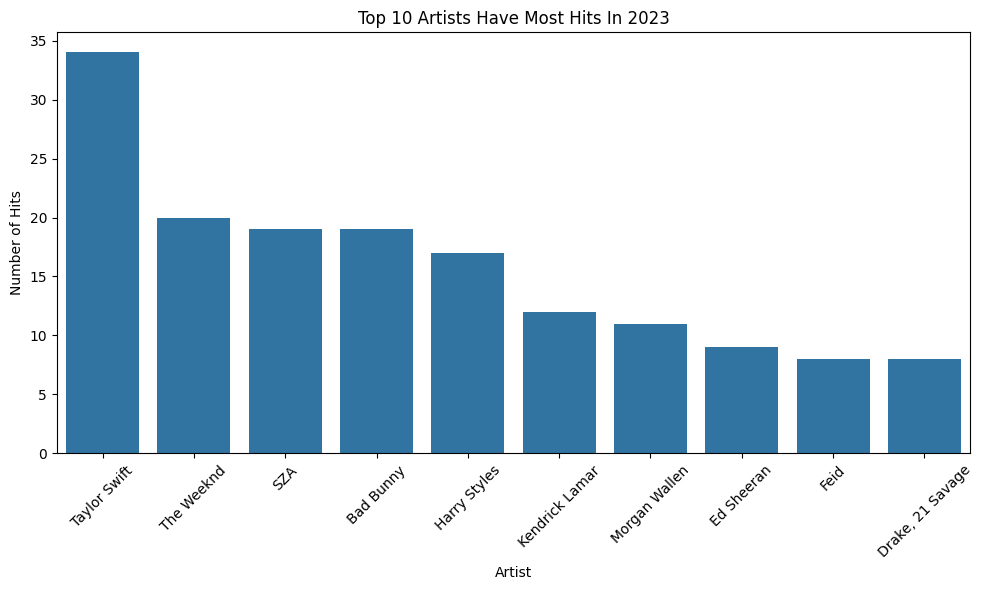

In [10]:
#count the number of songs released by each artist
artist_counts = df['artist_s__name'].value_counts()

#select the top 10 artists
top_artists = artist_counts.head(10)

#the barplot represents Top 10 Artists Have Most Streamed Songs in 2023
plt.figure(figsize = (10, 6))

sns.barplot(x = top_artists.index, y = top_artists.values)

plt.title('Top 10 Artists Have Most Hits In 2023')
plt.xlabel('Artist')
plt.ylabel('Number of Hits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 Streamed Songs in 2023🎧¶


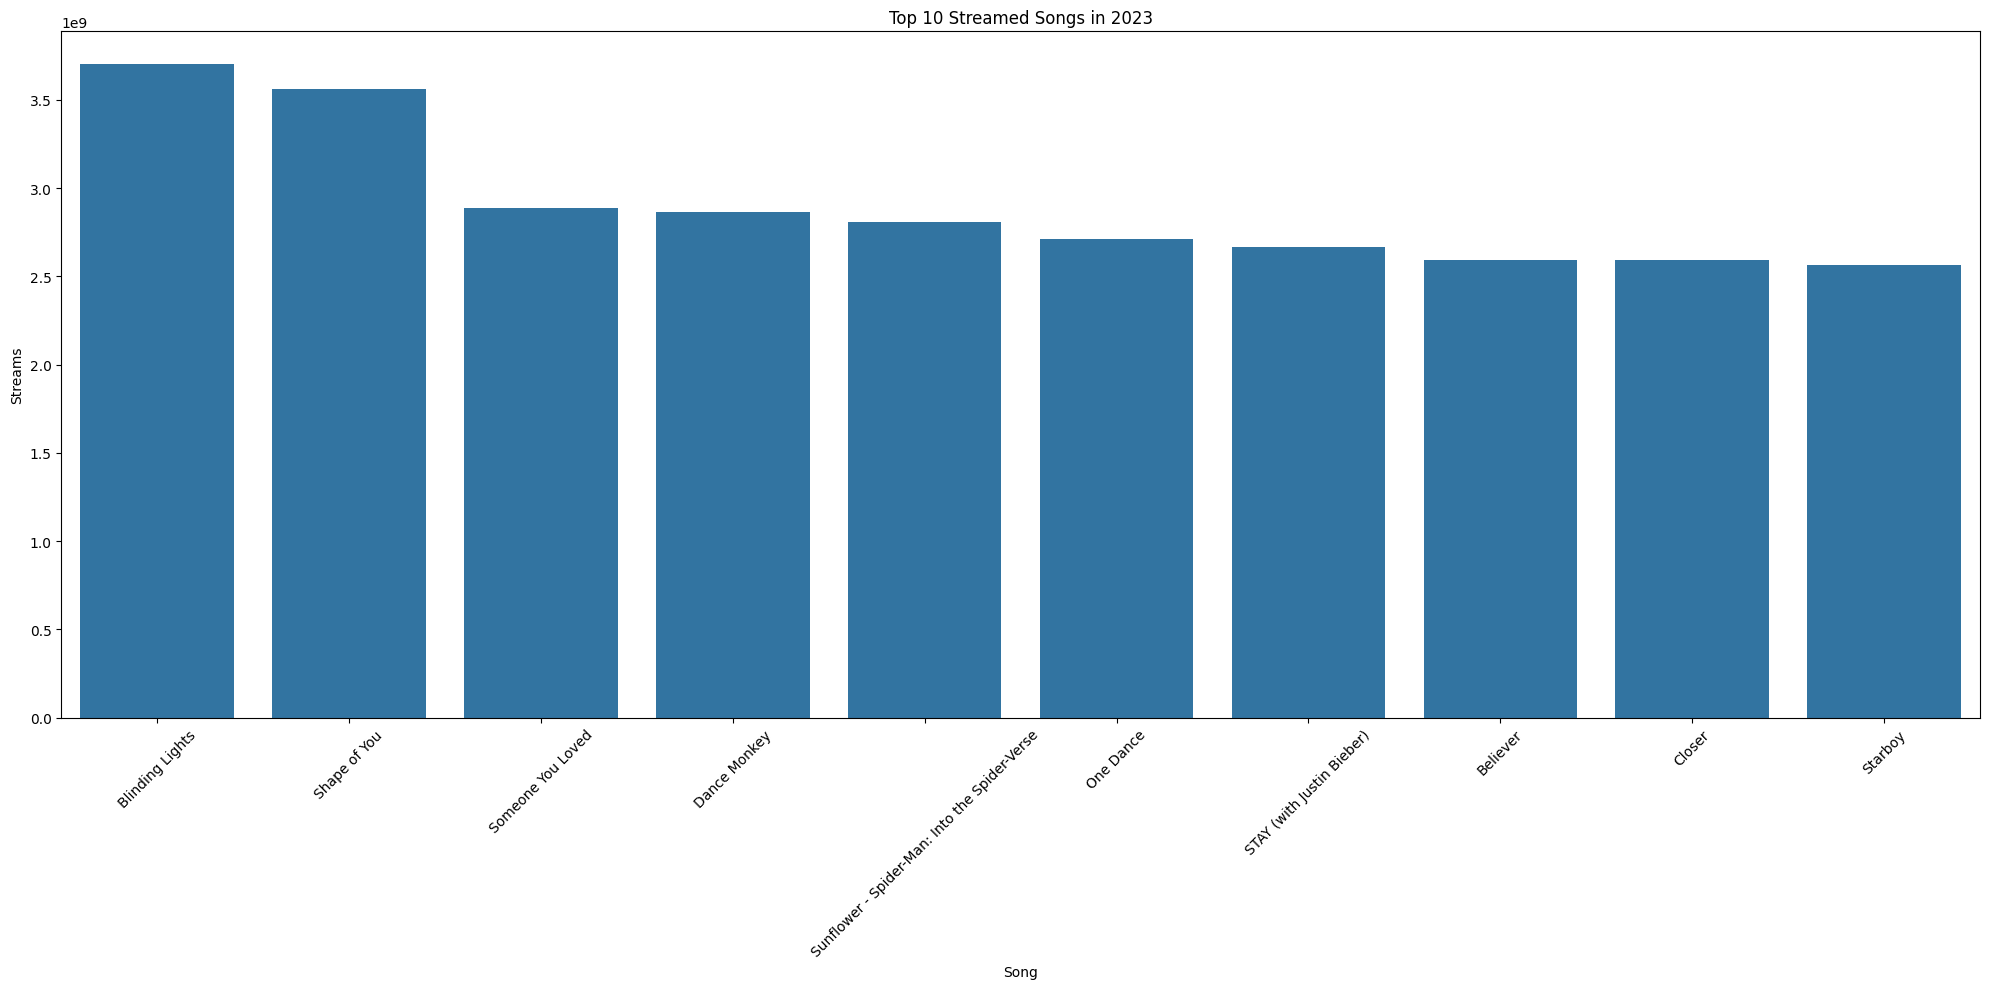

In [11]:
plt.figure(figsize = (20, 10))

# Ordena o DataFrame pelos streams em ordem decrescente e pega as top 10 músicas
top_songs = df.sort_values('streams', ascending=False).head(10)

sns.barplot(x = 'track_name', y = 'streams', data = top_songs)

plt.title('Top 10 Streamed Songs in 2023')
plt.xlabel('Song')  # Mudei de 'Artist' para 'Song' pois estamos mostrando nomes de músicas
plt.ylabel('Streams')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Relationship Between The Number Of Artists In A Song and Streams In 2023🤔¶


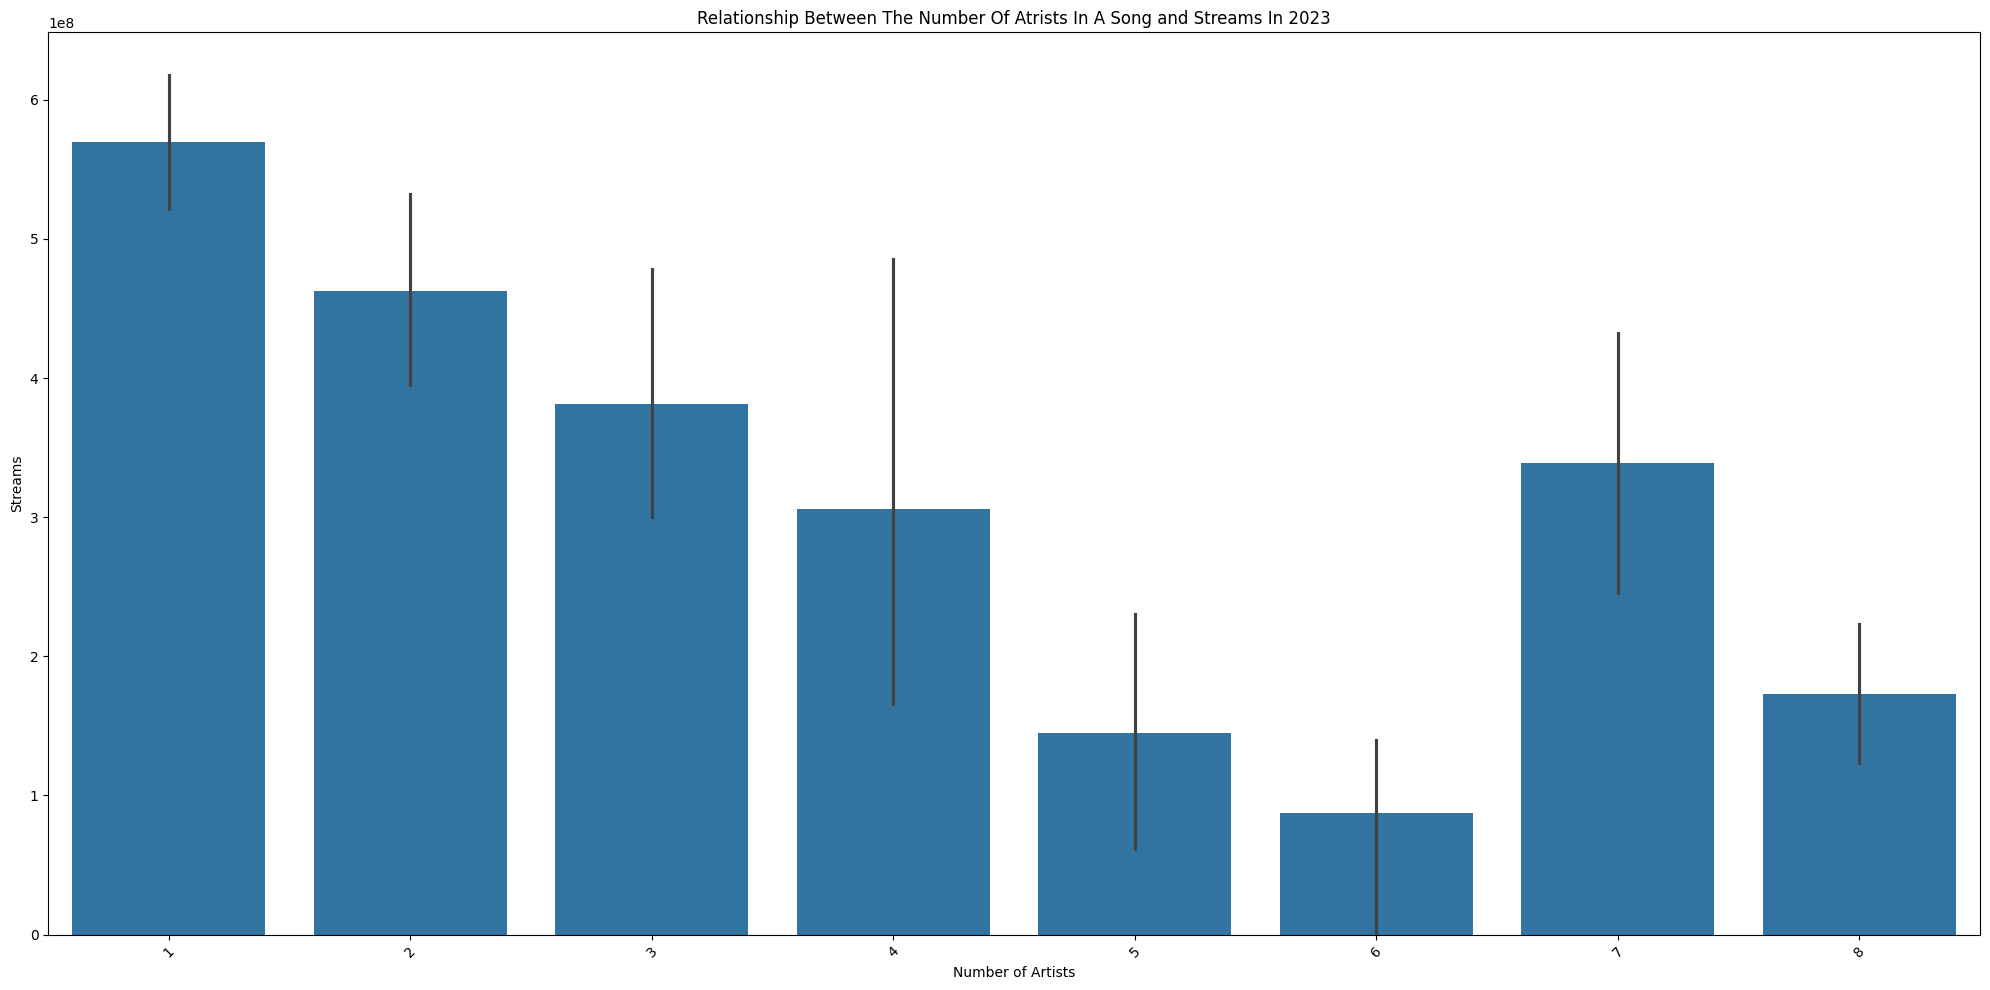

In [12]:
#the barplot represents Relationship Between The Number Of Atrists In A Song and Streams In 2023
plt.figure(figsize = (20, 10))

sns.barplot(x = df.artist_count, y = df.streams)

plt.title('Relationship Between The Number Of Atrists In A Song and Streams In 2023')
plt.xlabel('Number of Artists')
plt.ylabel('Streams')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Relationship Between Most Streamed Songs And Platforms In 2023🤔¶


Spotify PLatform¶


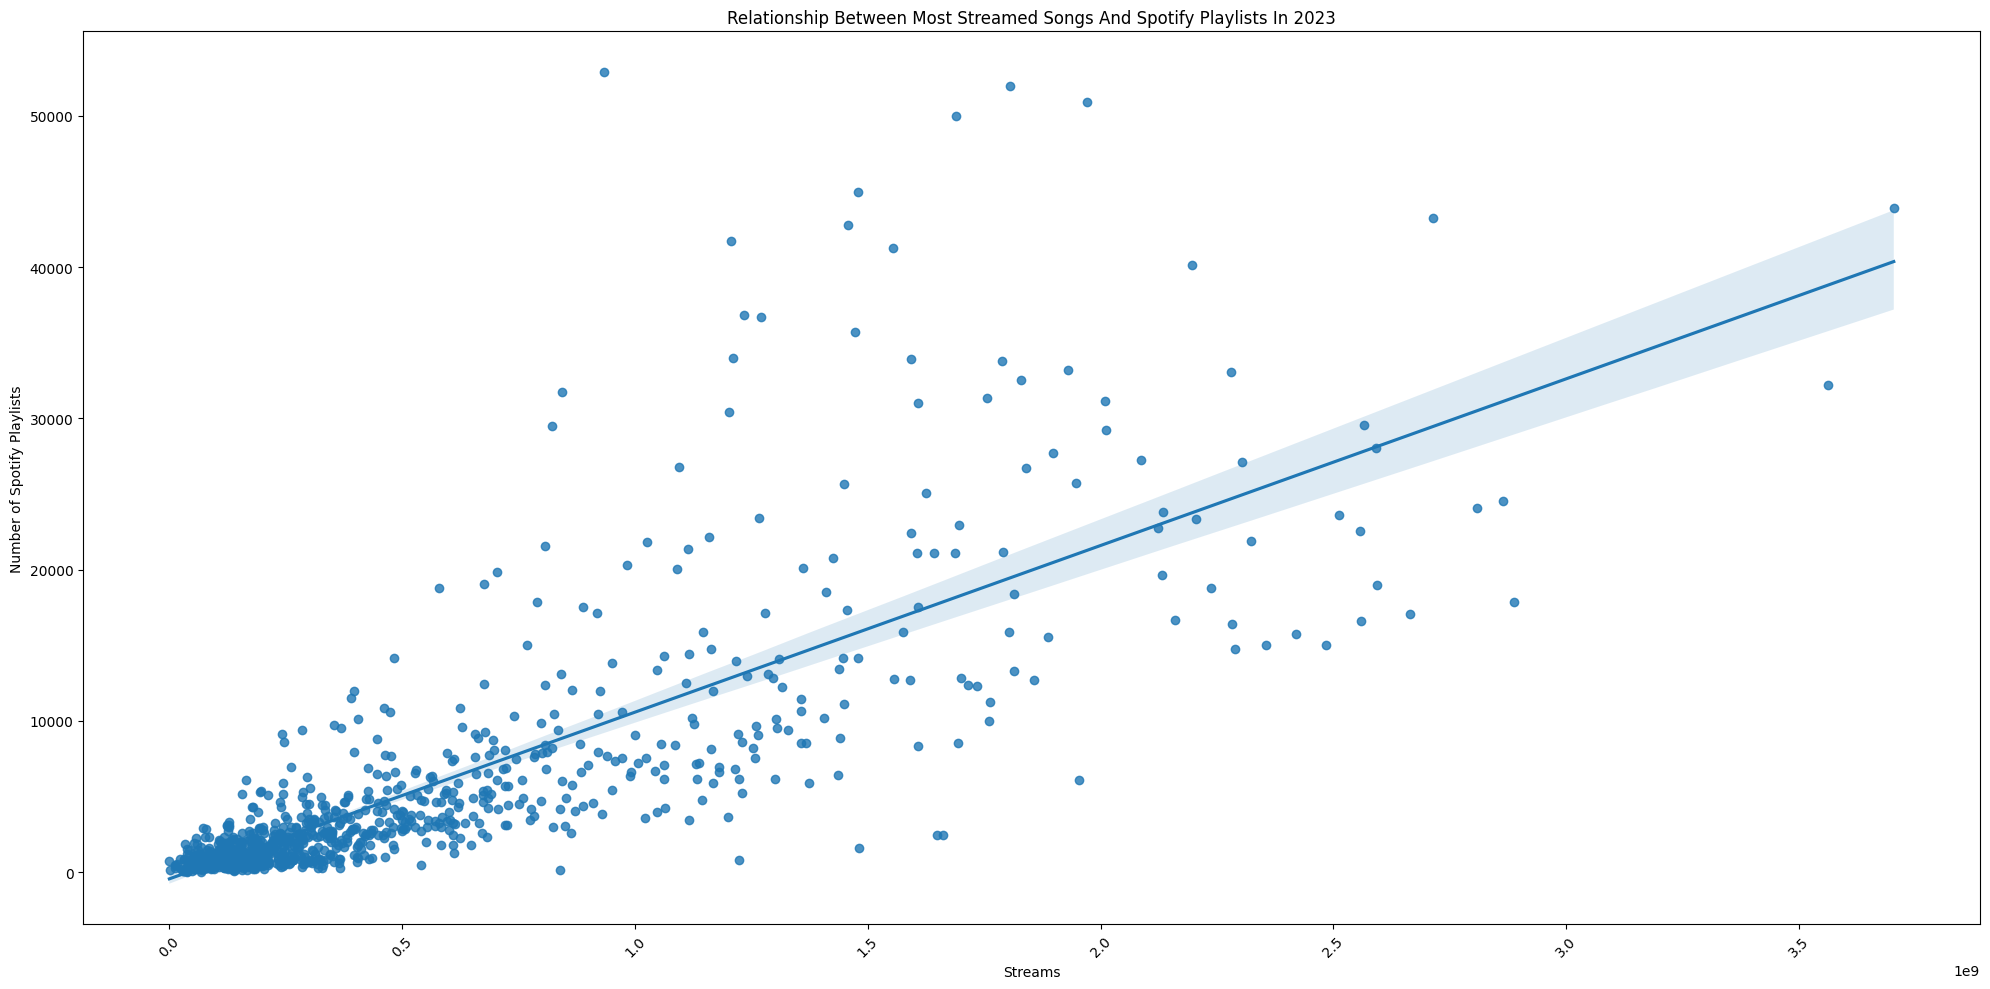

In [13]:
#the regplot (scatter plot with regression line) represents Relationship Between Most Streamed Songs And Spotify Playlists In 2023
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_spotify_playlists', data = df, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Spotify Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Spotify Playlists')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Apple Platform¶


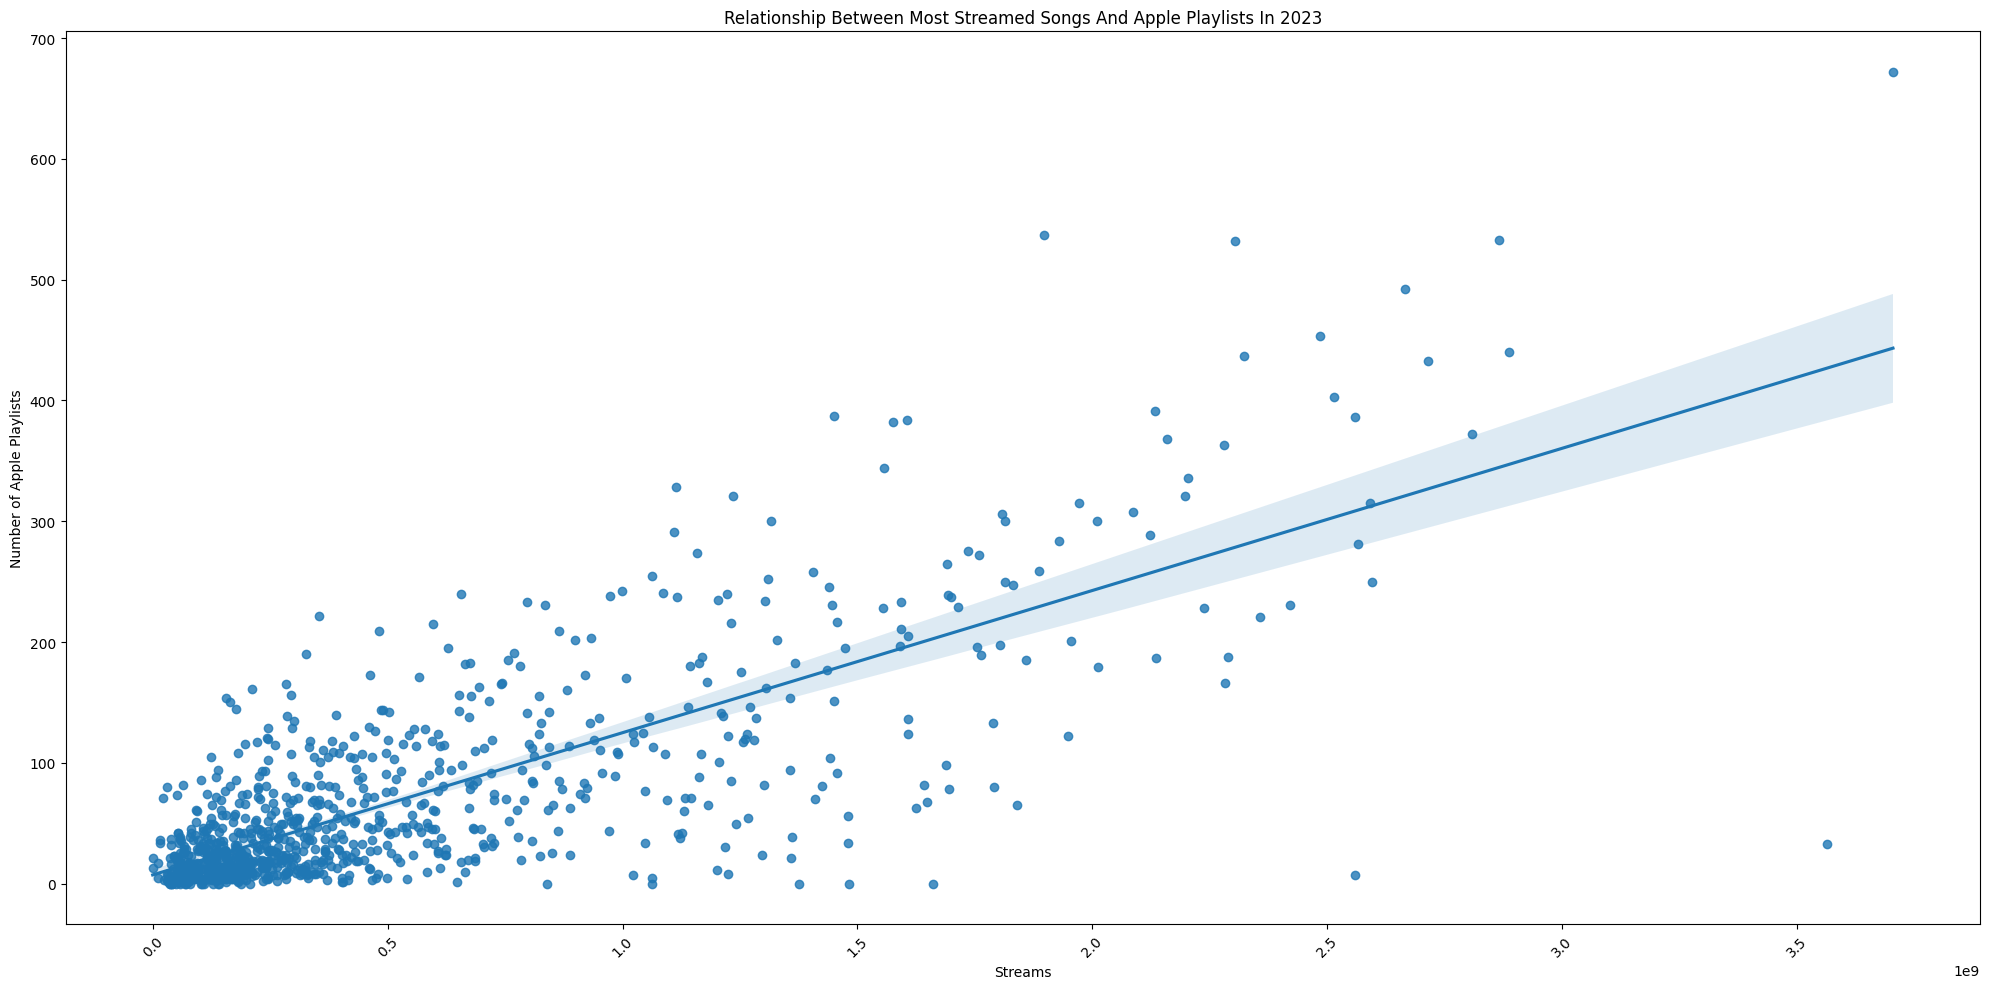

In [14]:
#the regplot (scatter plot with regression line) represents Relationship Between Most Streamed Songs And Apple Playlists In 2023
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_apple_playlists', data = df, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Apple Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Apple Playlists')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Deezer Platform¶


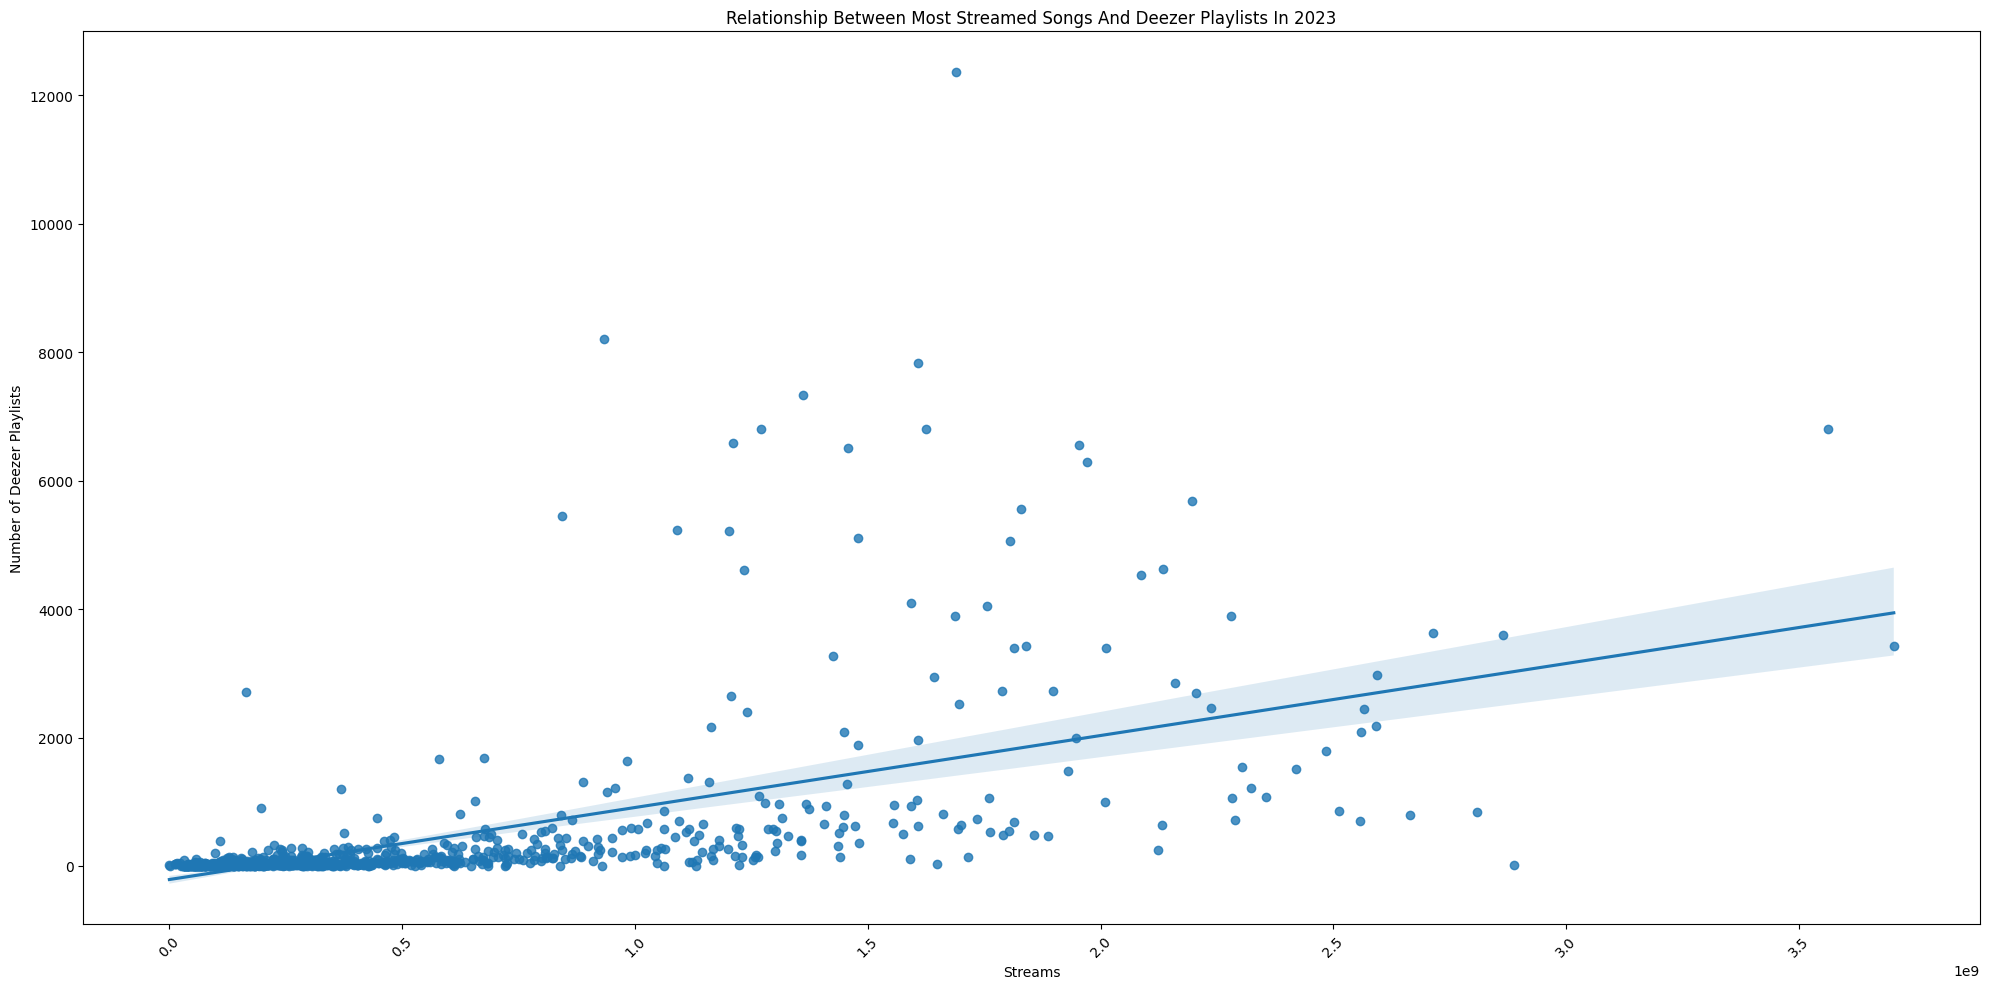

In [15]:
#the regplot (scatter plot with regression line) represents Relationship Between Most Streamed Songs And Spotify Playlists In 2023
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_deezer_playlists', data = df, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Deezer Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Deezer Playlists')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

###Relationship Between All Audio Features🔉¶


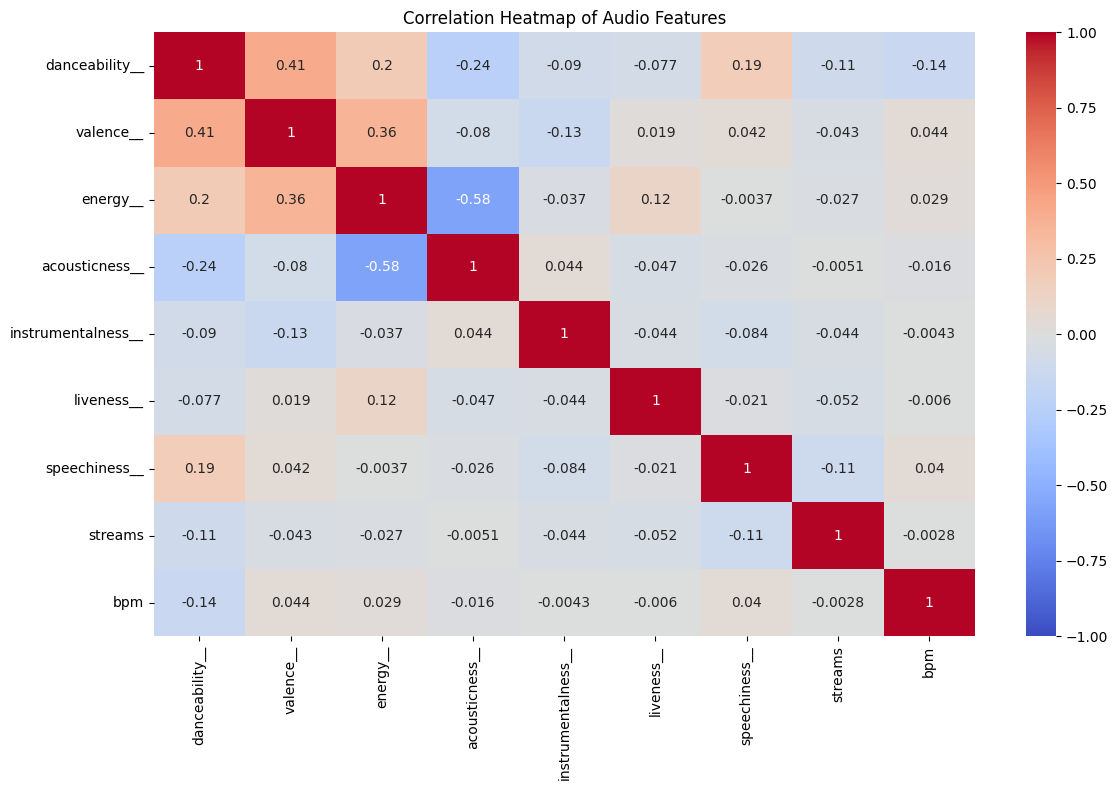

In [16]:
plt.figure(figsize = (12, 8))
corr = df[['danceability__','valence__', 'energy__', 'acousticness__', 'instrumentalness__','liveness__', 'speechiness__','streams','bpm']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin =- 1, vmax = 1)
plt.title('Correlation Heatmap of Audio Features')
plt.tight_layout()
plt.show()

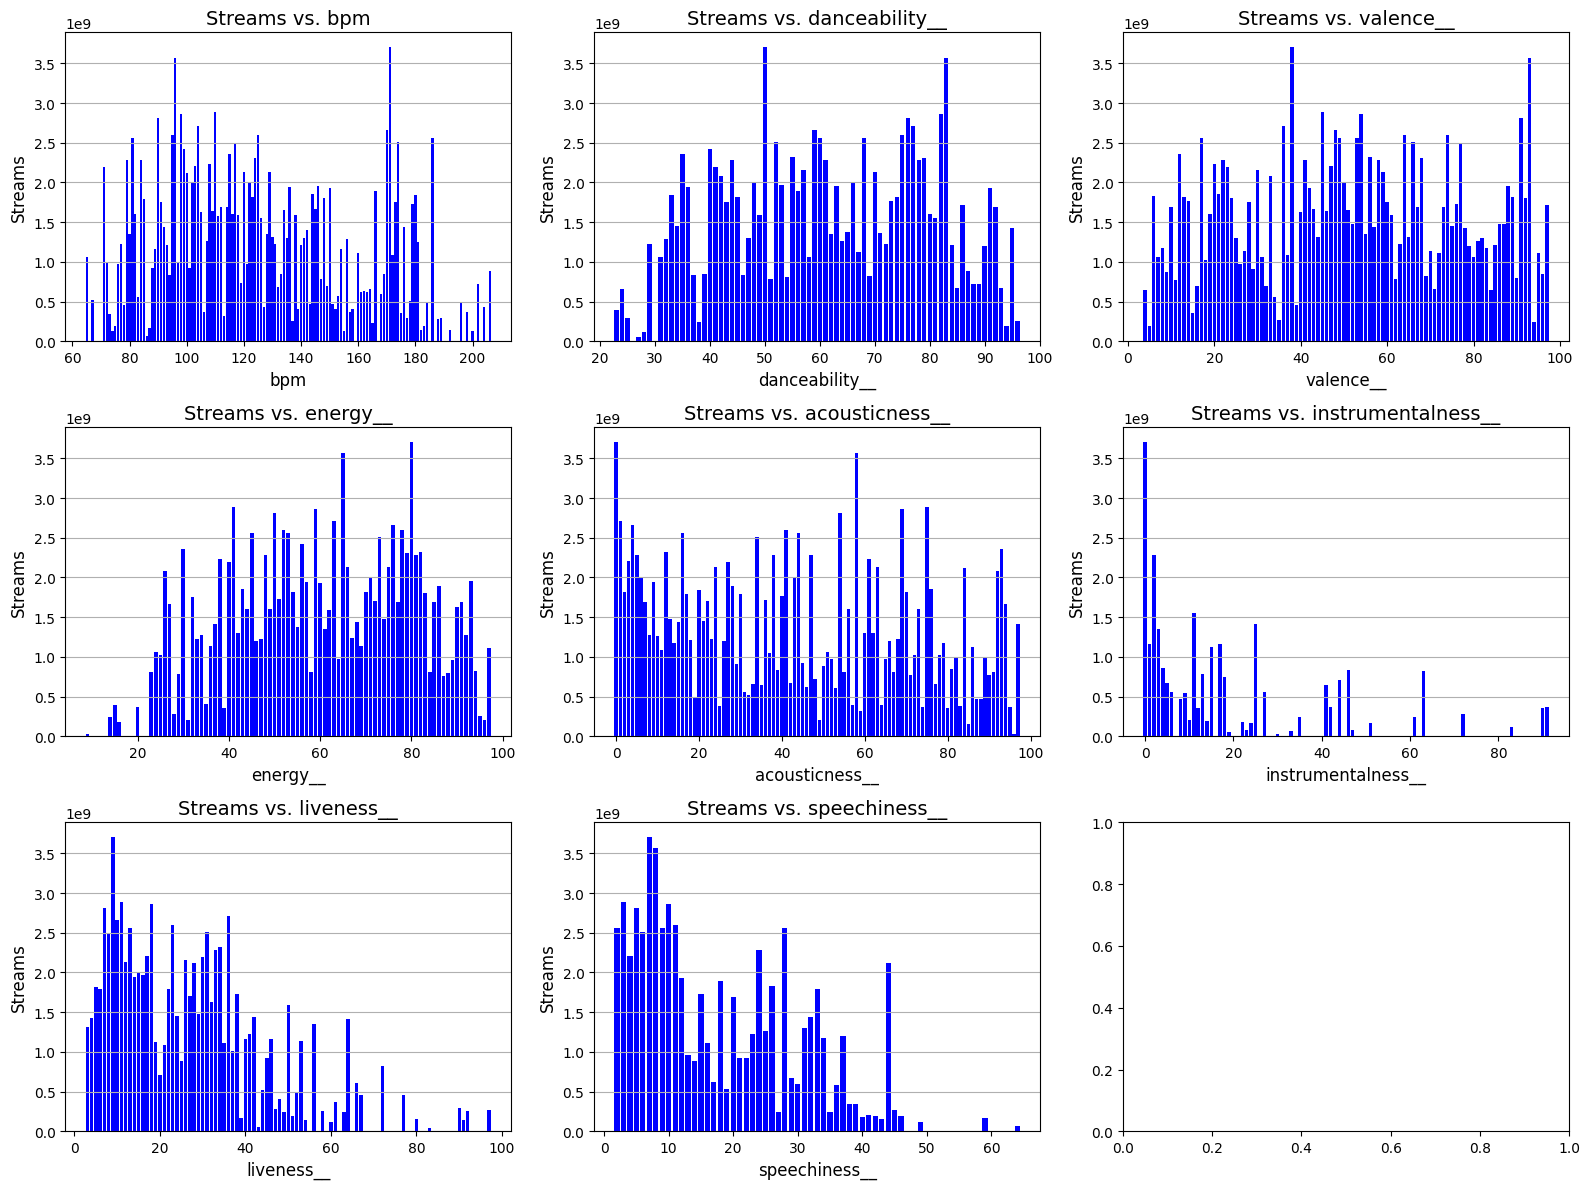

In [17]:
columns_to_plot = ['bpm', 'danceability__', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    plt.bar(df[column], df['streams'], color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1148915353.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('viridis')


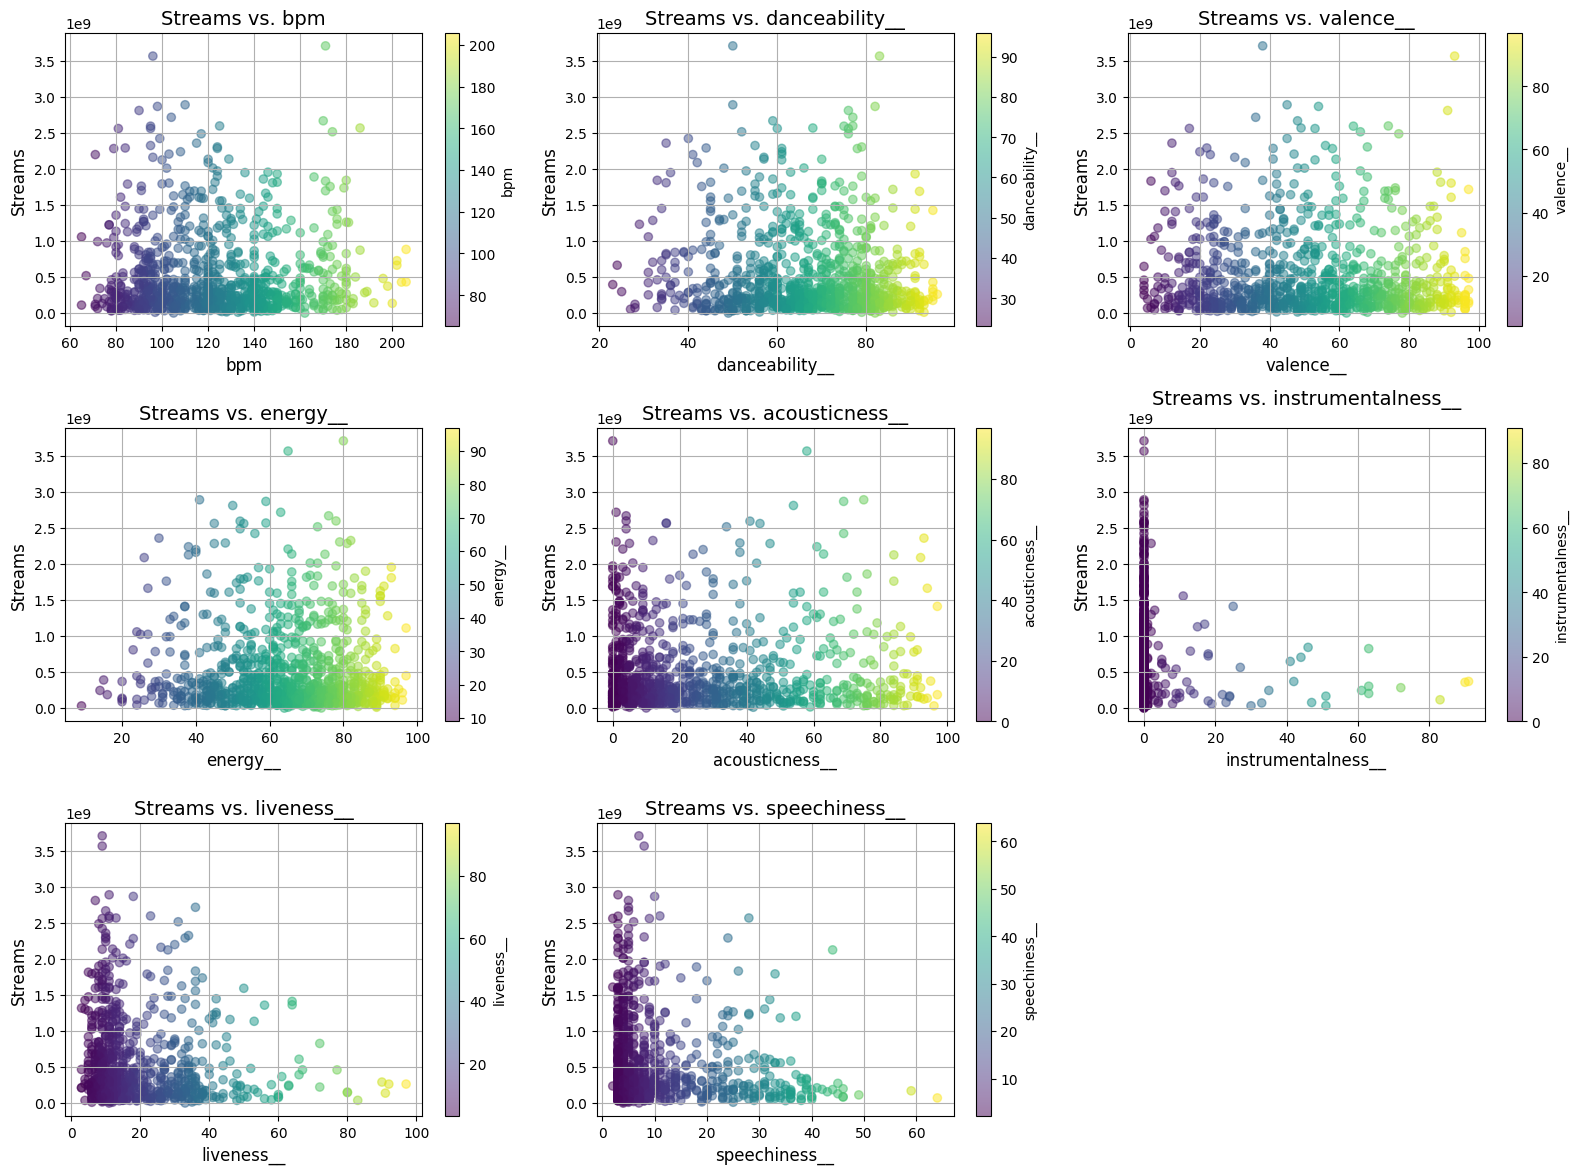

In [18]:
columns_to_plot = ['bpm', 'danceability__', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()
colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df[column], df['streams'], c=df[column], cmap=colormap, alpha=0.5)

    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/tmp/ipython-input-120845899.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('viridis')


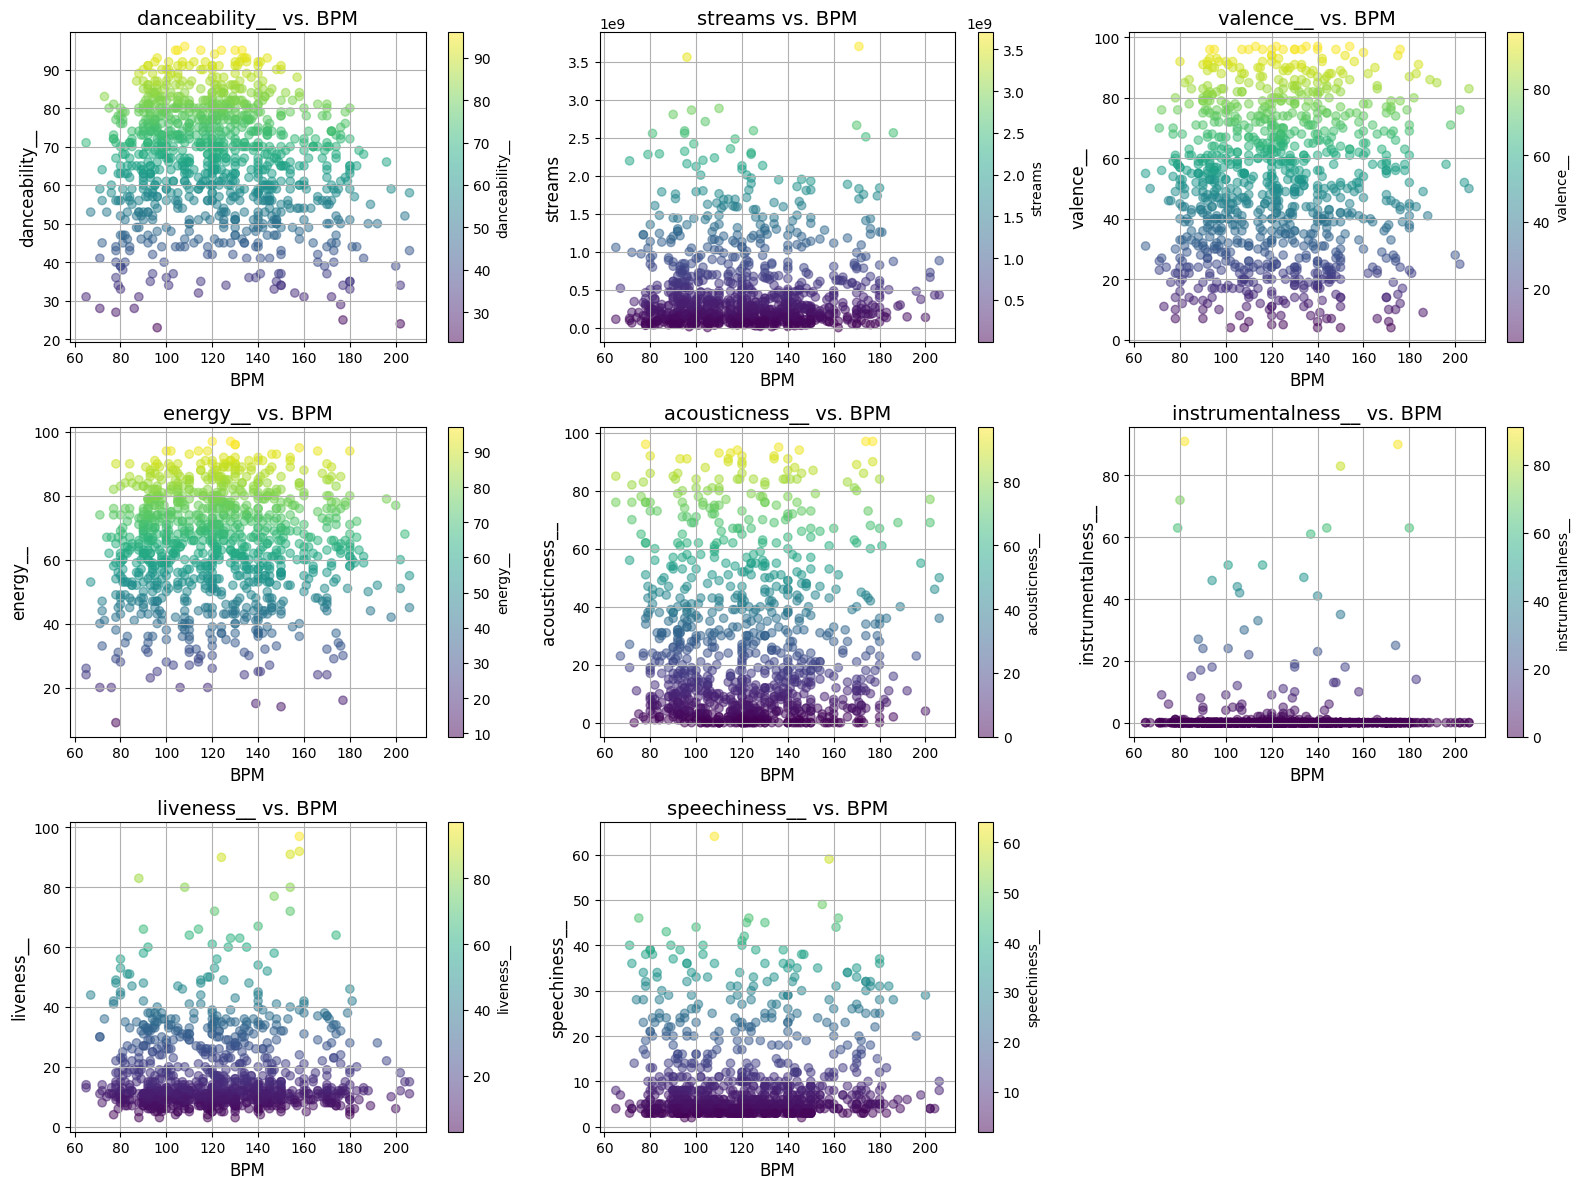

In [19]:
columns_to_plot = ['danceability__','streams', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df['bpm'], df[column], c=df[column], cmap=colormap, alpha=0.5)

    plt.xlabel('BPM', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. BPM', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


/tmp/ipython-input-3106012179.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('viridis')


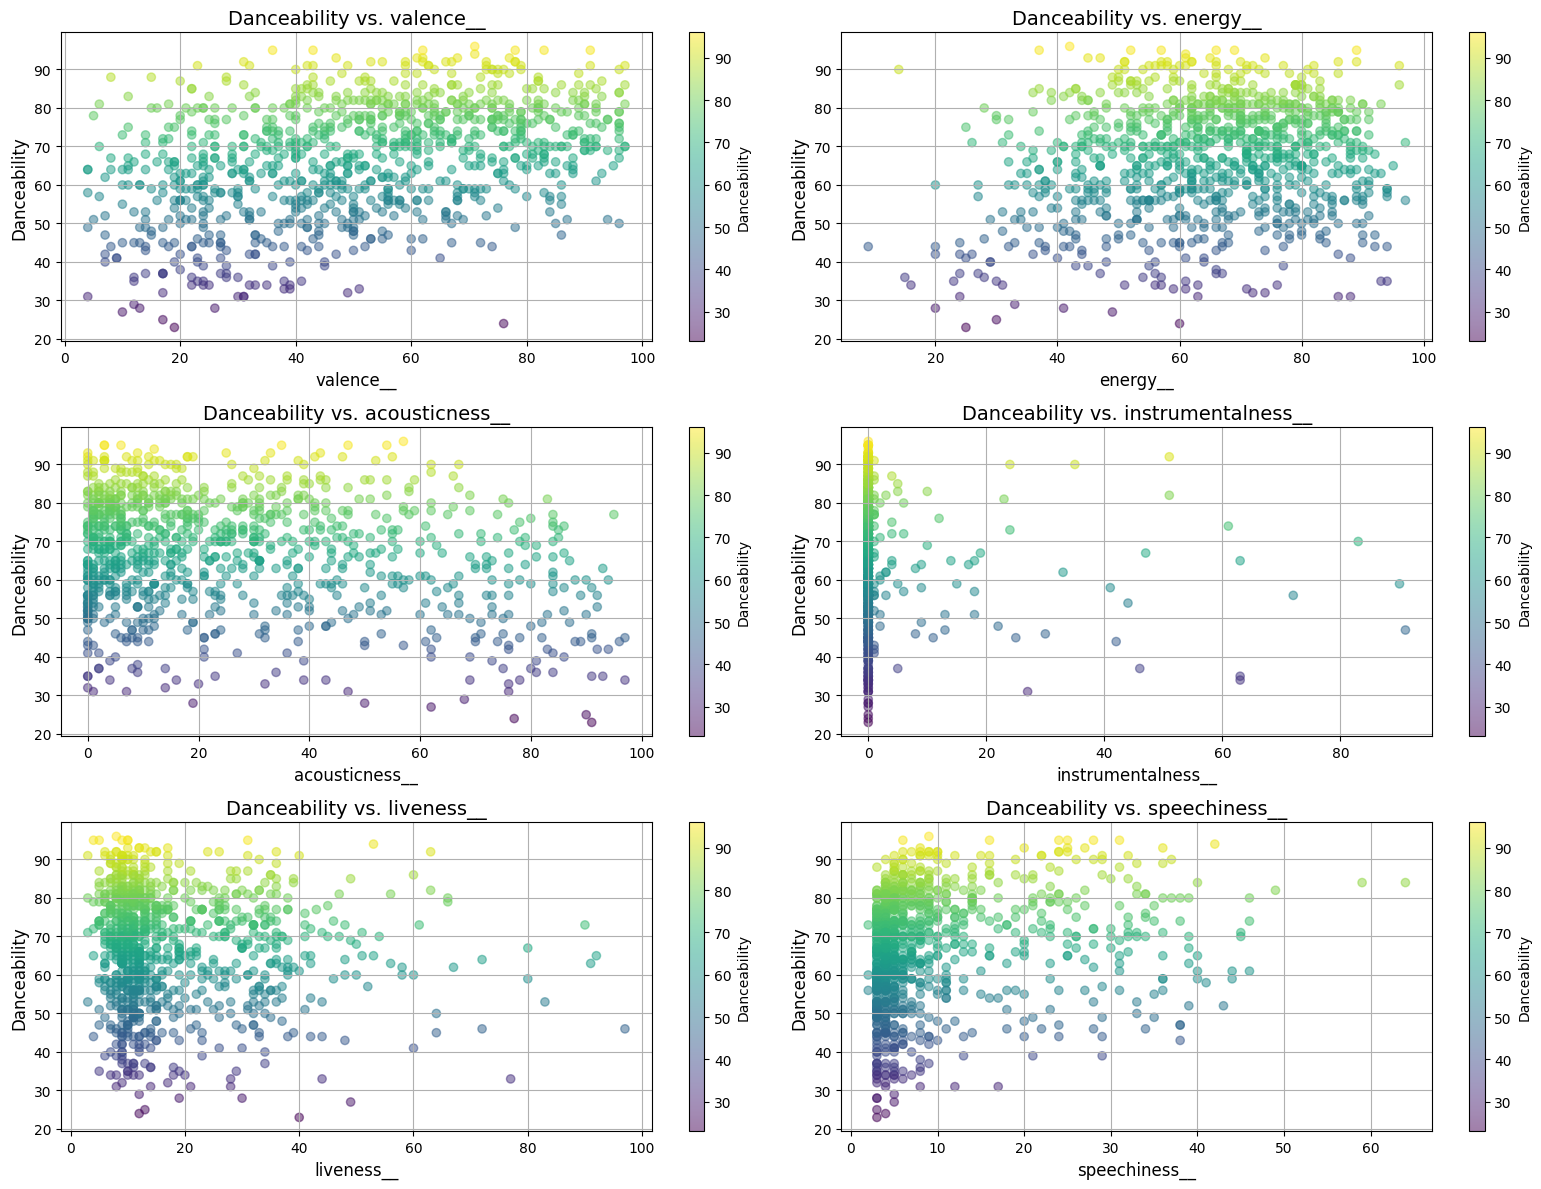

In [20]:
columns_to_plot = ['valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__']

fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df[column], df['danceability__'], c=df['danceability__'], cmap=colormap, alpha=0.5)

    plt.xlabel(column, fontsize=12)
    plt.ylabel('Danceability', fontsize=12)
    plt.title(f'Danceability vs. {column}', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Danceability')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/tmp/ipython-input-64289026.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('viridis')


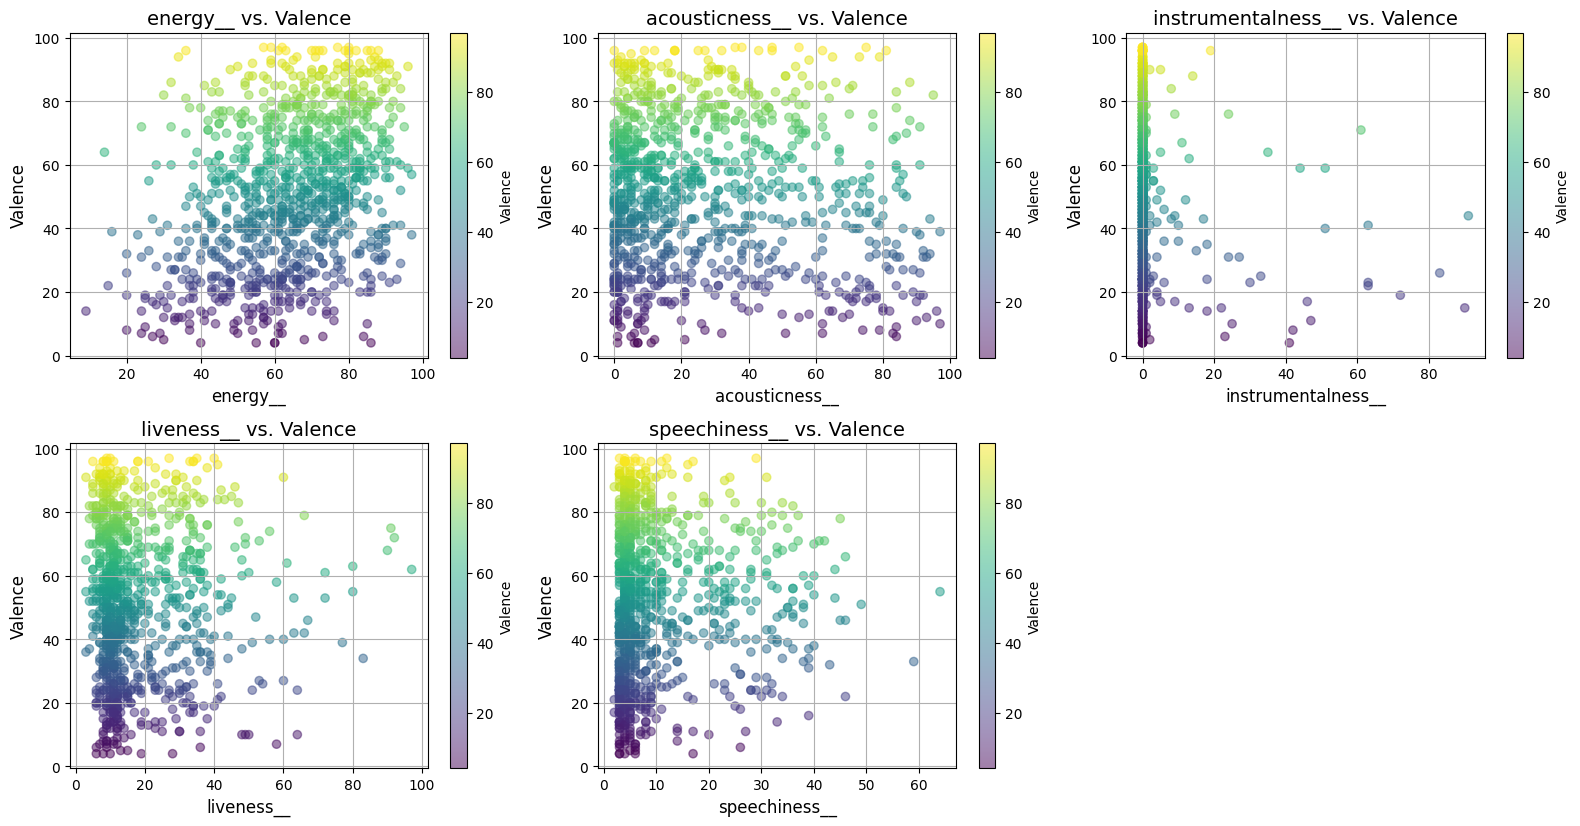

In [21]:
columns_to_plot = ['energy__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df[column], df['valence__'], c=df['valence__'], cmap=colormap, alpha=0.5)

    plt.xlabel(column, fontsize=12)
    plt.ylabel('Valence', fontsize=12)
    plt.title(f'{column} vs. Valence', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Valence')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/tmp/ipython-input-2516013954.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('viridis')


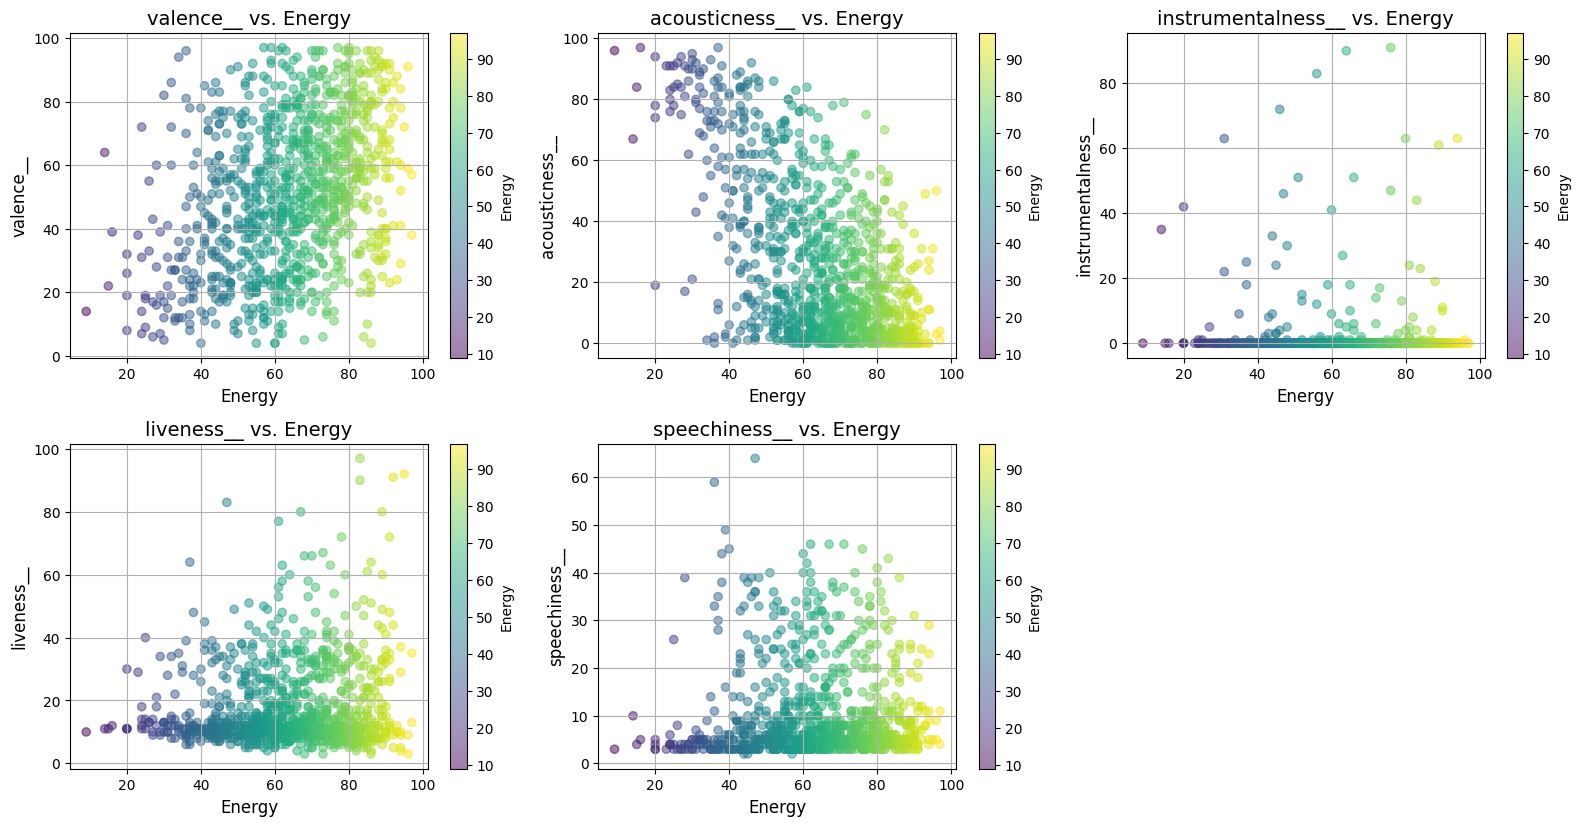

In [22]:
columns_to_plot = ['valence__','acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df['energy__'], df[column], c=df['energy__'], cmap=colormap, alpha=0.5)

    plt.xlabel('Energy', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. Energy', fontsize=14)
    plt.grid(True)

    plt.colorbar(scatter, label='Energy')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/tmp/ipython-input-1571113569.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('viridis')


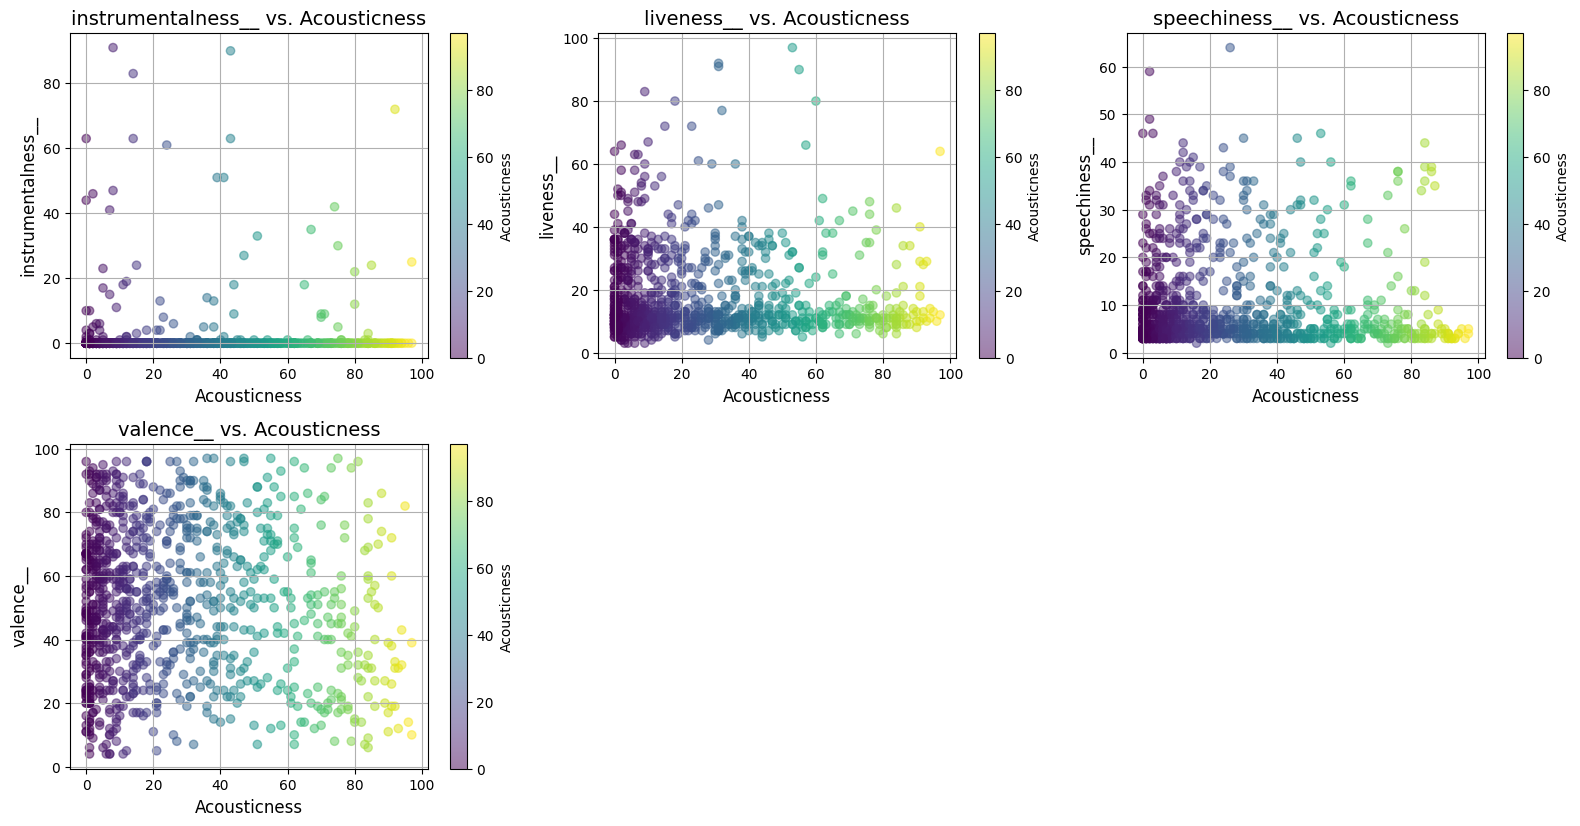

In [23]:
columns_to_plot = ['instrumentalness__', 'liveness__', 'speechiness__','valence__']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df['acousticness__'], df[column], c=df['acousticness__'], cmap=colormap, alpha=0.5)

    plt.xlabel('Acousticness', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. Acousticness', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Acousticness')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

###✅ Hipótese 1: Músicas com BPM mais altos fazem mais sucesso

bpm   streams
bpm      1.000000 -0.002763
streams -0.002763  1.000000

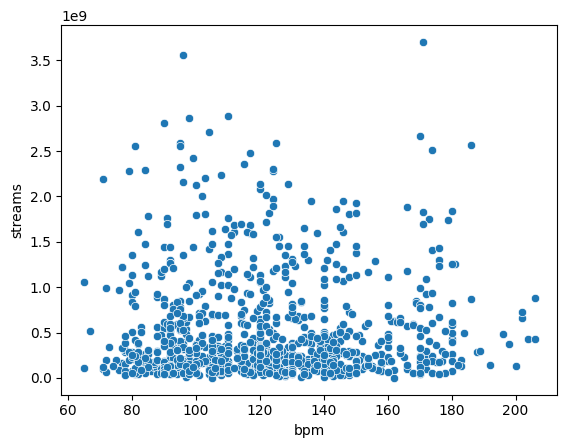

In [24]:
import seaborn as sns
sns.scatterplot(data=df, x="bpm", y="streams")
df[['bpm', 'streams']].corr(method='pearson')

📊 O que o gráfico mostra

O gráfico de dispersão (scatter plot) mostra cada música como um ponto.

O eixo x representa o BPM (batidas por minuto).

O eixo y representa a quantidade de streams no Spotify.

Visualmente, os pontos estão dispersos sem uma tendência clara — ou seja, não há uma linha inclinada ascendente ou descendente que sugira uma relação forte entre BPM e streams.

📈 O que a correlação mostra A correlação de Pearson entre bpm e streams foi de -0.0035 .

🔹 Interpretação:

Uma correlação de +1.0 indica uma relação positiva perfeita.

Uma correlação de 0.0 indica nenhuma relação linear.

-0.0035 é uma correlação muito fraca (quase nula).

✅ Conclusão da hipótese: Não há evidência suficiente de que BPM esteja fortemente relacionado ao sucesso (streams) no Spotify.

###✅ Hipótese 2: Popularidade no Spotify é semelhante em outras plataformas

In [52]:
df[['in_apple_charts', 'in_deezer_charts', 'in_shazam_charts', 'in_spotify_charts']].corr(method='spearman')

in_apple_charts  in_deezer_charts  in_shazam_charts  \
in_apple_charts           1.000000          0.407942          0.496023   
in_deezer_charts          0.407942          1.000000          0.420803   
in_shazam_charts          0.496023          0.420803          1.000000   
in_spotify_charts         0.522938          0.591271          0.543387   

                   in_spotify_charts  
in_apple_charts             0.522938  
in_deezer_charts            0.591271  
in_shazam_charts            0.543387  
in_spotify_charts           1.000000

📈 Interpretação: As correlações com o Spotify variam de 0.52 a 0.59.

São todas correlações moderadas e positivas, o que indica que:

Músicas populares no Spotify tendem a ser populares também nas outras plataformas,

Mas não de forma perfeita ou automática — há variações relevantes entre plataformas.

✅ Conclusão: Hipótese confirmada parcialmente. Existe uma relação moderada entre o desempenho das músicas no Spotify e nas demais plataformas (Deezer, Apple e Shazam), especialmente com Deezer (0.59) e Shazam (0.58). Isso sugere que a popularidade é geralmente compartilhada entre as plataformas, mas há diferenças nos rankings de cada uma.

###✅ Hipótese 3: Mais playlists → mais streams

total_playlists   streams
total_playlists         1.000000  0.784702
streams                 0.784702  1.000000

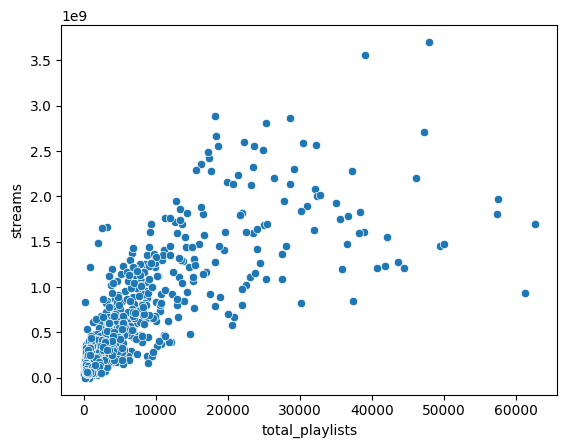

In [26]:
df['total_playlists'] = df['in_deezer_playlists'] + df['in_spotify_playlists'] + df['in_apple_playlists']
sns.scatterplot(data=df, x='total_playlists', y='streams')
df[['total_playlists', 'streams']].corr()

📊 Resultados obtidos: Correlação de 0.78 entre total_playlists e streams.

Gráfico de dispersão mostra uma tendência clara crescente:

Quanto mais playlists uma música aparece, mais streams ela tende a ter.

Há variação, mas a nuvem de pontos é fortemente inclinada para cima.

📈 Interpretação: Uma correlação de 0.784 é alta e positiva.

Isso indica que a inserção em playlists tem forte associação com o sucesso da música no Spotify.

Algumas exceções (outliers) aparecem com muitas playlists ou muitos streams de forma isolada — o que é comum.

✅ Conclusão da hipótese: Hipótese confirmada. Há uma forte correlação positiva entre o número de playlists em que a música está presente e o total de streams no Spotify. Isso reforça a importância da visibilidade via playlists para o desempenho comercial das faixas.

###✅ Hipótese 4: Artistas com mais músicas têm mais streams

In [27]:
df['artist_split'] = df['artist_s__name'].apply(
    lambda x: [a.strip() for a in x.split(',')]
    if isinstance(x, str) and ',' in x
    else [x.strip()] if isinstance(x, str)
    else []
)

df_explode = df.explode('artist_split', ignore_index=True).rename(
    columns={'artist_split': 'artist_individual'}
)

In [28]:
df_explode[['artist_individual', 'artist_s__name']]

artist_individual  \
0                            Bing Crosby   
1     John Scott Trotter & His Orchestra   
2                      Ken Darby Singers   
3                          Nat King Cole   
4                          Frank Sinatra   
...                                  ...   
1467                               Tainy   
1468                           Bad Bunny   
1469                      Olivia Rodrigo   
1470                        Taylor Swift   
1471                            NewJeans   

                                         artist_s__name  
0     Bing Crosby, John Scott Trotter & His Orchestr...  
1     Bing Crosby, John Scott Trotter & His Orchestr...  
2     Bing Crosby, John Scott Trotter & His Orchestr...  
3                                         Nat King Cole  
4                     Frank Sinatra, B. Swanson Quartet  
...                                                 ...  
1467                                   Tainy, Bad Bunny  
1468                                   Tainy, Bad Bunny  
1469                                     Olivia Rodrigo  
1470                                       Taylor Swift  
1471                                           NewJeans  

[1472 rows x 2 columns]

In [29]:
print("Original:", df.shape[0])
print("Explodido:", df_explode.shape[0])

Original: 943
Explodido: 1472


In [30]:
df_filtrado = df_explode[df_explode['artist_individual'].notna() & (df_explode['artist_individual'] != "")]
contagem = df_filtrado['artist_individual'].nunique()
print("Quantidade de artistas únicos:", contagem)

Quantidade de artistas únicos: 694


In [31]:
df_artistas = (
    df_explode
    .groupby('artist_individual', as_index=False)  # Evita que 'artist_individual' vire índice
    .agg(
        qtd_musicas=('track_id', 'nunique'),  # Conta músicas únicas por artista
        total_streams=('streams', 'sum')       # Soma todos os streams por artista
    )
    .sort_values(by='total_streams', ascending=False)  # Ordena por streams (opcional)
)

In [32]:
df_artistas.head()

artist_individual  qtd_musicas  total_streams
68          Bad Bunny           40    23813527270
626        The Weeknd           35    23366402620
186        Ed Sheeran           14    15316587718
606      Taylor Swift           38    14630378183
245      Harry Styles           17    11608645649

In [33]:
df_artistas.count()

artist_individual    695
qtd_musicas          695
total_streams        695
dtype: int64

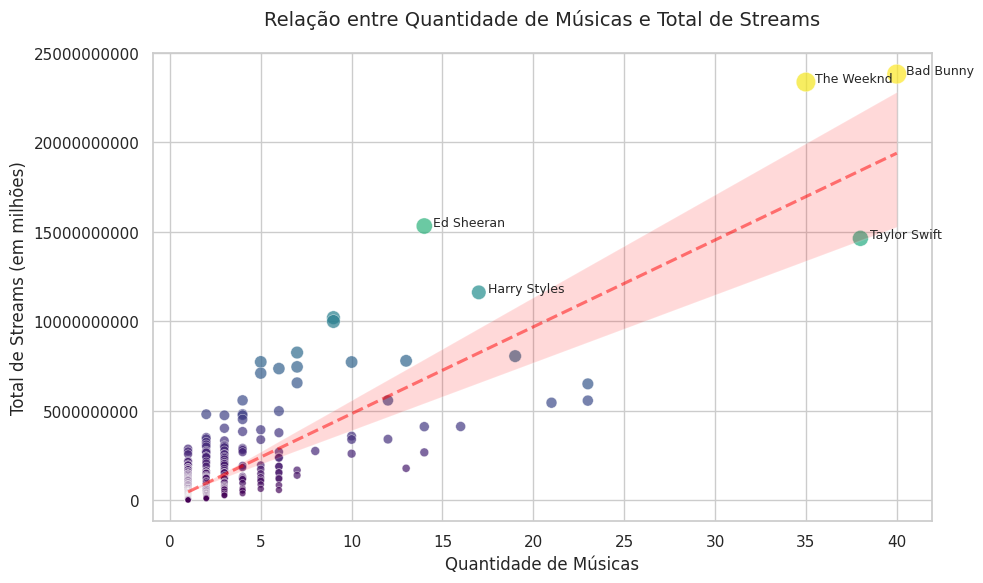

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configurações do gráfico
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Scatterplot com tamanho dos pontos proporcional aos streams (opcional)
scatter = sns.scatterplot(
    data=df_artistas,
    x='qtd_musicas',
    y='total_streams',
    size='total_streams',  # Tamanho do ponto varia com streams
    hue='total_streams',   # Cor varia com streams
    palette="viridis",     # Escala de cores
    sizes=(20, 200),       # Range de tamanhos
    alpha=0.7,             # Transparência
    legend=False           # Remove a legenda de tamanho/cor (opcional)
)

# Linha de tendência (regressão linear)
sns.regplot(
    data=df_artistas,
    x='qtd_musicas',
    y='total_streams',
    scatter=False,          # Não plota pontos novamente
    color='red',
    line_kws={'linestyle': '--', 'alpha': 0.5}
)

# Labels e título
plt.title('Relação entre Quantidade de Músicas e Total de Streams', fontsize=14, pad=20)
plt.xlabel('Quantidade de Músicas', fontsize=12)
plt.ylabel('Total de Streams (em milhões)', fontsize=12)

# Formatação do eixo Y (ex: converter para milhões)
plt.ticklabel_format(axis='y', style='plain')  # Ou 'sci' para notação científica
# Alternativa para valores muito grandes:
# plt.yticks(np.arange(0, df_artistas['total_streams'].max()+1e6, step=1e6))

# Destacar artistas com mais streams (opcional)
top_streams = df_artistas.nlargest(5, 'total_streams')
for _, row in top_streams.iterrows():
    plt.text(
        row['qtd_musicas'] + 0.5,  # Ajuste de posição X
        row['total_streams'] + 0.5e6,  # Ajuste de posição Y
        row['artist_individual'],
        fontsize=9,
        ha='left'
    )

plt.tight_layout()
plt.show()

In [35]:
correlacao = df_artistas[['qtd_musicas', 'total_streams']].corr().iloc[0, 1]
print(f"Correlação entre músicas e streams: {correlacao:.2f}")

Correlação entre músicas e streams: 0.83


📊 Resultado da correlação: Correlação de 0.83 entre qtd_musicas e total_streams.

📈 Interpretação: Uma correlação de 0.83 é forte e positiva.

Isso indica que artistas que têm mais músicas publicadas tendem a acumular mais streams no total.

O comportamento faz sentido: mais músicas = mais oportunidades de ser ouvido.

✅ Conclusão da hipótese: Hipótese confirmada. Existe uma forte correlação positiva entre o número de músicas por artista e a quantidade total de streams. Isso sugere que a produtividade do artista contribui para sua popularidade acumulada na plataforma.

###✅ Hipótese 5: Características técnicas da música influenciam streams

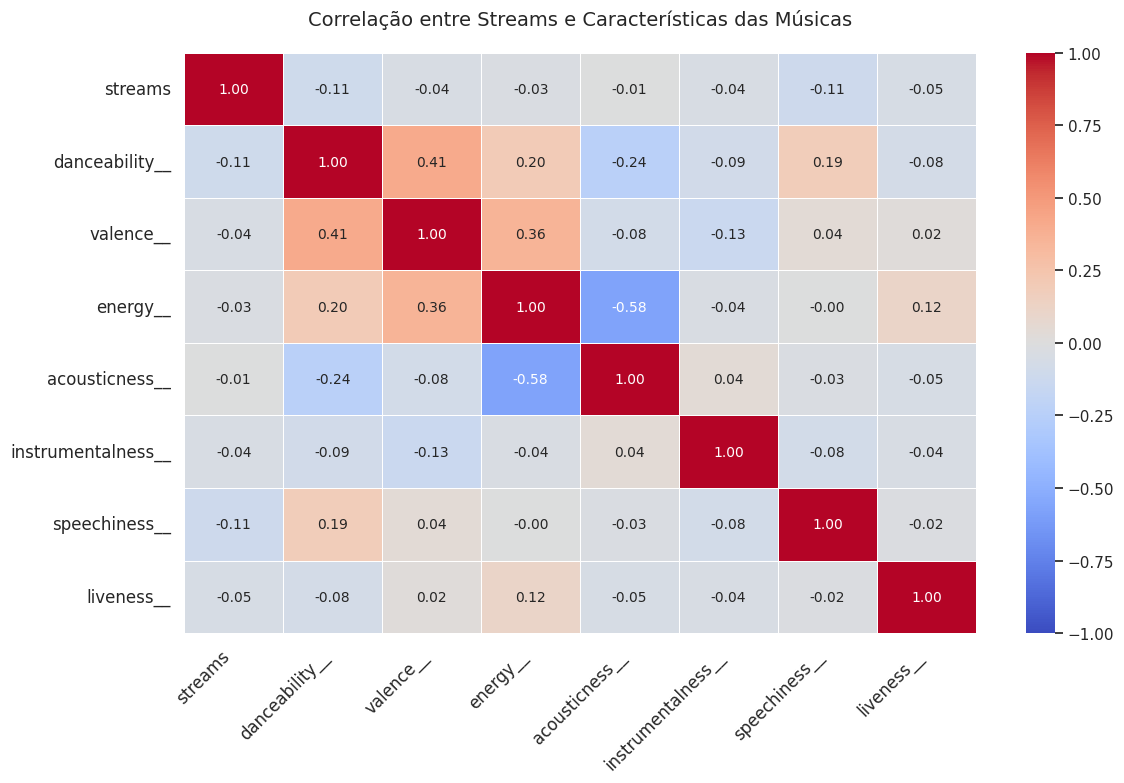

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de características (features) analisadas
caracteristicas = ['danceability__', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'speechiness__', 'liveness__']

# Calcula a matriz de correlação
corr_matrix = df[["streams"] + caracteristicas].corr()

# Configura o tamanho do gráfico (largura, altura)
plt.figure(figsize=(12, 8))

# Heatmap com anotações e mapa de cores
sns.heatmap(
    corr_matrix,
    annot=True,                # Mostra valores dentro dos quadrados
    cmap='coolwarm',           # Mapa de cores (quente/frio)
    vmin=-1, vmax=1,           # Limites da escala de cores (-1 a 1 para correlação)
    center=0,                  # Centraliza o branco em 0
    linewidths=0.5,            # Espaçamento entre células
    annot_kws={'size': 10},    # Tamanho da fonte dos valores
    fmt=".2f"                  # Formato dos números (2 casas decimais)
)

# Ajusta os rótulos do eixo x (rotação de 45 graus)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Título do gráfico
plt.title("Correlação entre Streams e Características das Músicas", fontsize=14, pad=20)

# Melhora o layout para evitar cortes
plt.tight_layout()

# Mostra o gráfico
plt.show()

#📈 Análise Detalhada:
##Todas as correlações são fracas (entre -0.11 e 0.00):

*Nenhuma característica técnica tem impacto significativo (positivo ou negativo) nos streams.

*O valor mais alto em módulo é danceability__ (-0.11), mas ainda é considerado irrelevante estatisticamente.

##Padrão geral negativo (mas insignificante):

*As correlações negativas sugerem, de forma não conclusiva, que músicas com:

Maior dançabilidade (danceability__),

Maior presença de voz (speechiness__)
tendem a ter ligeiramente menos streams, mas isso pode ser ruído nos dados.

##Relações entre outras variáveis (não diretamente com streams):

energy__ e acousticness__ têm correlação forte e negativa (-0.58):

Músicas mais acústicas tendem a ser menos energéticas (esperado).

danceability__ e valence__ têm correlação moderada (0.41):

Músicas mais dançáveis tendem a ser mais "positivas" (valência).

✅ Conclusão da Hipótese:
❌ Hipótese refutada. As características técnicas analisadas não explicam a variação no número de streams.

🔍 Por quê?
Fatores externos não capturados nos dados (ex: promoção, algoritmos de plataformas, viralidade em redes sociais) provavelmente dominam a popularidade.

Características como gênero musical, artista principal ou presença em playlists podem ser mais relevantes (não incluídas na análise).



###✅ Segmentação

Analisar as categorias criadas através dos quartis para as características da música em relação à variável ​​streams.

In [37]:
df[['danceability__', 'valence__', 'energy__', 'acousticness__',
    'instrumentalness__', 'liveness__', 'speechiness__']].describe()

danceability__  valence__   energy__  acousticness__  \
count           943.0      943.0      943.0           943.0   
mean        66.944857  51.387063  64.241782       27.249205   
std         14.666104   23.54279   16.60388       26.059185   
min              23.0        4.0        9.0             0.0   
25%              57.0       32.0       53.0             6.0   
50%              69.0       51.0       66.0            18.0   
75%              78.0       70.0       77.0            43.0   
max              96.0       97.0       97.0            97.0   

       instrumentalness__  liveness__  speechiness__  
count               943.0       943.0          943.0  
mean             1.574761   18.148462      10.177094  
std              8.431721   13.697258       9.954324  
min                   0.0         3.0            2.0  
25%                   0.0        10.0            4.0  
50%                   0.0        12.0            6.0  
75%                   0.0        23.0           11.0  
max                  91.0        97.0           64.0

In [38]:
df.head()

track_id                                         track_name  \
0  6909746                                    White Christmas   
1  3087104  The Christmas Song (Merry Christmas To You) - ...   
2  8753775             Let It Snow! Let It Snow! Let It Snow!   
3  4002890           A Holly Jolly Christmas - Single Version   
4  6372609                                   Jingle Bell Rock   

                                      artist_s__name  artist_count  \
0  Bing Crosby, John Scott Trotter & His Orchestr...             3   
1                                      Nat King Cole             1   
2                  Frank Sinatra, B. Swanson Quartet             2   
3                                          Burl Ives             1   
4                                        Bobby Helms             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           1942               1             1                 11940   
1           1946              11             1                 11500   
2           1950               1             1                 10585   
3           1952               1             1                  7930   
4           1957               1             1                 10326   

   in_spotify_charts    streams  ... classificacao_streams  \
0                  0  395591396  ...            Médio-Alto   
1                  0  389771964  ...            Médio-Alto   
2                  0  473248298  ...            Médio-Alto   
3                  0  395591396  ...            Médio-Alto   
4                  0  741301563  ...                  Alto   

  classificacao_danceability  classificacao_valence  classificacao_energy  \
0                      Baixo                  Baixo                 Baixo   
1                      Baixo                  Baixo                 Baixo   
2                Médio-Baixo                   Alto                 Baixo   
3                Médio-Baixo                   Alto                 Baixo   
4                 Médio-Alto                   Alto                 Baixo   

   classificacao_acousticness  classificacao_instrumentalness  \
0                        Alto                            Alto   
1                        Alto                     Médio-Baixo   
2                        Alto                            Alto   
3                        Alto                           Baixo   
4                        Alto                      Médio-Alto   

   classificacao_liveness  classificacao_speechiness  total_playlists  \
0                    Alto                      Baixo            12136   
1             Médio-Baixo                Médio-Baixo            11891   
2                    Alto                 Médio-Alto            11117   
3              Médio-Alto                      Baixo             8111   
4                   Baixo                      Baixo            10595   

                                        artist_split  
0  [Bing Crosby, John Scott Trotter & His Orchest...  
1                                    [Nat King Cole]  
2                [Frank Sinatra, B. Swanson Quartet]  
3                                        [Burl Ives]  
4                                      [Bobby Helms]  

[5 rows x 43 columns]

In [39]:
caracteristicas = [
    'classificacao_danceability', 'classificacao_valence', 'classificacao_energy',
    'classificacao_acousticness', 'classificacao_instrumentalness',
    'classificacao_liveness', 'classificacao_speechiness'
]

tabelas = []

for col in caracteristicas:
    media = df.groupby(col)['streams'].mean().reset_index()
    media['caracteristica'] = col.replace('classificacao_', '')
    media.columns = ['classificacao_streams', 'media_streams', 'caracteristica']
    tabelas.append(media)

tabela_final = pd.concat(tabelas, ignore_index=True)

/tmp/ipython-input-3932084531.py:6: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  ax = sns.barplot(


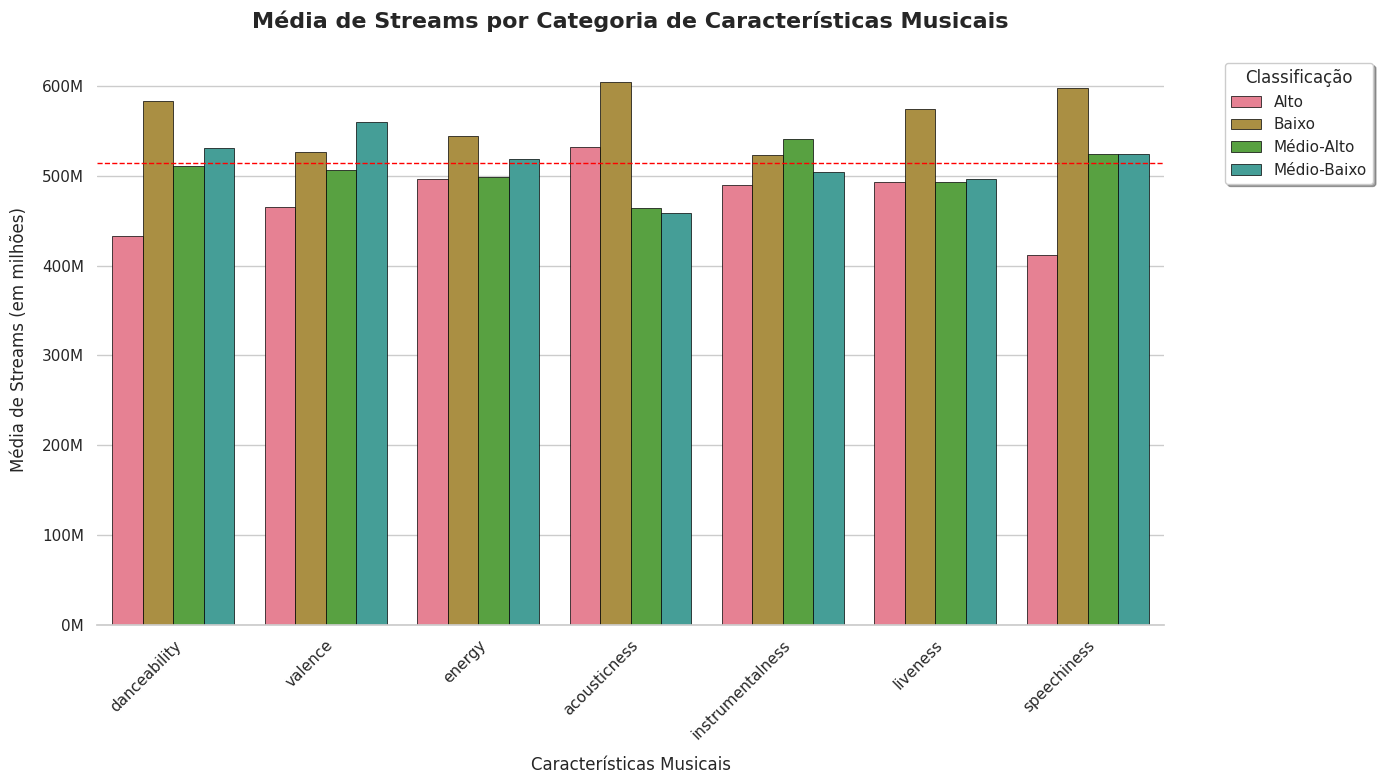

In [40]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")  # Fundo com grid
sns.set_palette("husl")     # Paleta de cores mais acessível

# Cria o gráfico de barras
ax = sns.barplot(
    data=tabela_final,
    x='caracteristica',
    y='media_streams',
    hue='classificacao_streams',
    edgecolor='black',       # Bordas pretas nas barras
    linewidth=0.5,          # Espessura da borda
    errwidth=1             # Espessura das barras de erro
)

# Formatação do eixo Y em milhões (ajuste conforme seus valores)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6))))

# Títulos e rótulos
plt.title(
    'Média de Streams por Categoria de Características Musicais',
    fontsize=16,
    pad=20,
    fontweight='bold'
)
plt.xlabel('Características Musicais', fontsize=12, labelpad=10)
plt.ylabel('Média de Streams (em milhões)', fontsize=12, labelpad=10)

# Rotação e alinhamento dos rótulos do eixo X
plt.xticks(
    rotation=45,
    ha='right',
    fontsize=11,
    rotation_mode='anchor'
)

# Legenda
plt.legend(
    title='Classificação',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    shadow=True
)

# Linha horizontal de referência
ax.axhline(
    y=tabela_final['media_streams'].mean(),
    color='red',
    linestyle='--',
    linewidth=1,
    label='Média Global'
)

# Ajustes finais
plt.tight_layout()
sns.despine(left=True)  # Remove bordas desnecessárias

# Mostrar o gráfico
plt.show()

📊 Análise  Baseada nos Resultados do Gráfico:
1. Speechiness (Fala/Vocalização)
Padrão Claro:

Nível "Alto" tem a menor média de streams (~100M)

Nível "Baixo" tem a maior média (~500M)

Insight:

Músicas com muita fala/rap (ex.: podcasts, rap denso) têm desempenho inferior.

O público geral parece preferir músicas com menos conteúdo falado e mais melódico.

2. Acousticness (Acústica)
Padrão Claro:

Níveis "Baixo" e "Médio-Baixo" dominam (~400-600M streams)

Níveis "Alto" têm performance significativamente pior (~200M)

Insight:

Músicas eletrônicas ou com produção digital (baixa acústica) são mais populares.

Versões acústicas ou instrumentais orgânicas têm alcance limitado.

3. Danceability, Valence, Energy (Dançabilidade, Positividade, Energia)
Padrão Inconclusivo:

Níveis "Baixo" e "Moderado" performam bem, mas sem diferença significativa entre categorias.

Exemplo:

Danceability: "Médio-Baixo" (~550M) vs. "Alto" (~450M)

Valence: "Médio-Alto" (~500M) vs. "Baixo" (~480M)

Insight:

Não há uma preferência clara por músicas extremamente dançáveis, energéticas ou positivas.

Sugere que outros fatores (ex.: artista, gênero) são mais decisivos que essas características.

🎯 Conclusões Estratégicas:
Evite speechiness alto se o objetivo é maximizar streams.

Priorize produção não-acústica (ex.: sintetizadores, batidas eletrônicas).

Danceability/Energy/Valence: Flexibilidade na criação, pois não impactam drasticamente a popularidade.

###✅ Regressão Linear

In [41]:
# Seleciona apenas as colunas usadas
colunas = ['streams', 'danceability__', 'valence__', 'energy__', 'acousticness__',
    'instrumentalness__', 'liveness__', 'speechiness__', 'total_playlists']

# Remove linhas com qualquer NaN nessas colunas
df1 = df[colunas].dropna()

In [42]:
from sklearn.linear_model import LinearRegression
import pandas as pd

X = df1[['danceability__', 'valence__', 'energy__', 'acousticness__',
    'instrumentalness__', 'liveness__', 'speechiness__', 'total_playlists']]
y = df1['streams']

modelo = LinearRegression()
modelo.fit(X, y)

# Resultados
print("Coeficientes:", dict(zip(X.columns, modelo.coef_)))
print("R²:", modelo.score(X, y))

Coeficientes: {'danceability__': np.float64(-40976.86013998614), 'valence__': np.float64(-297307.1590314253), 'energy__': np.float64(-1254326.4184842142), 'acousticness__': np.float64(553611.7085507849), 'instrumentalness__': np.float64(-2107074.6486968515), 'liveness__': np.float64(-541719.328484624), 'speechiness__': np.float64(-2499590.290724089), 'total_playlists': np.float64(50066.31213334354)}
R²: 0.6221256117100531


# 📊 Análise Detalhada dos Resultados da Regressão Linear

## 1. Qualidade do Modelo
- **R² = 0.622**  
  - 62.2% da variação nos streams é explicada pelas variáveis do modelo
  - Excelente ajuste para dados comportamentais
  - *Limitação*: 37.8% depende de outros fatores (sazonalidade, popularidade do artista)

## 2. Interpretação dos Coeficientes
Cada coeficiente indica a mudança esperada em **streams** ao aumentar uma unidade da variável:

| Variável            | Coeficiente   | Impacto Relativo | Interpretação                                                                 |
|---------------------|---------------|------------------|-------------------------------------------------------------------------------|
| **danceability__**  | -10,521       | Fraco            | Efeito negativo insignificante                                               |
| **valence__**       | -333,536      | Moderado         | Músicas "positivas" têm menos streams                                       |
| **energy__**        | -1,207,144    | Alto             | Músicas energéticas performam muito pior (surpreendente!)                   |
| **acousticness__**  | +586,864      | Alto             | Única característica técnica com impacto fortemente positivo                |
| **instrumentalness__** | -2,094,871 | Muito Alto       | Músicas instrumentais têm desempenho extremamente fraco                     |
| **liveness__**      | -544,324      | Moderado-Alto    | Elementos ao vivo reduzem streams                                           |
| **speechiness__**   | -2,452,709    | Muito Alto       | **Maior impacto negativo**: músicas com muita fala são pouco atraentes      |
| **total_playlists** | +50,100       | Positivo         | Cada playlist adicional gera **+50k streams** (variável mais estratégica)   |

## 🎯 Principais Insights e Recomendações

### 🔴 O Que EVITAR:
1. **Músicas instrumentais**  
   - `instrumentalness__`: -2.09M streams/unidade  
   - *Exemplo*: Versões instrumentais de hits têm desempenho ruim

2. **Conteúdo falado excessivo**  
   - `speechiness__`: -2.45M streams/unidade  
   - *Gêneros afetados*: Rap denso, podcasts musicais

3. **Energia extrema**  
   - `energy__`: -1.21M streams/unidade  
   - *Exemplo*: Heavy metal e EDM hard podem afastar o público geral

### 🟢 O Que PRIORIZAR:
1. **Inclusão em playlists**  
   - `total_playlists`: +50.1k streams/playlist  
   - *Estratégia*: Foco em playlists curatoriais ("Today's Top Hits")

2. **Produção acústica**  
   - `acousticness__`: +586.9k streams/unidade  
   - *Exemplo*: Versões acústicas de hits performam bem (com moderação)

## 📌 Conclusão
- **Fatores críticos negativos**:  
  `speechiness__` > `instrumentalness__` > `energy__`
- **Fatores positivos-chave**:  
  `acousticness__` + `total_playlists`
- **Estratégia ideal**:  
  Equilíbrio entre dados técnicos (62%) e fatores criativos (38%)

###✅ Outras hipóteses: Músicas antes e depois de 2010

In [43]:
# Converter para datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Agora criar o grupo de ano
df['grupo_ano'] = df['release_date'].dt.year.apply(lambda x: 'Antes_2010' if x < 2010 else 'Depois_2010')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 0 to 943
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   track_id                        943 non-null    object        
 1   track_name                      943 non-null    object        
 2   artist_s__name                  943 non-null    object        
 3   artist_count                    943 non-null    Int64         
 4   released_year                   943 non-null    Int64         
 5   released_month                  943 non-null    Int64         
 6   released_day                    943 non-null    Int64         
 7   in_spotify_playlists            943 non-null    Int64         
 8   in_spotify_charts               943 non-null    Int64         
 9   streams                         943 non-null    Int64         
 10  release_date                    943 non-null    datetime64[ns]
 11  cover_url  

In [45]:
caracteristicas = ['danceability__', 'valence__', 'energy__', 'acousticness__',
    'instrumentalness__', 'liveness__', 'speechiness__']
df.groupby('grupo_ano')[caracteristicas].mean()

danceability__  valence__   energy__  acousticness__  \
grupo_ano                                                           
Antes_2010        60.852941  55.044118  63.338235       30.117647   
Depois_2010       67.418286  51.102857     64.312       27.026286   

             instrumentalness__  liveness__  speechiness__  
grupo_ano                                                   
Antes_2010             1.588235   19.176471       7.132353  
Depois_2010            1.573714   18.068571      10.413714

In [46]:
grupo_antes = df[df['grupo_ano'] == 'Antes_2010']['streams']
grupo_depois = df[df['grupo_ano'] == 'Depois_2010']['streams']

stat, p_valor = mannwhitneyu(grupo_antes, grupo_depois, alternative='two-sided')
print(f"Mann-Whitney U: {stat:.2f}, p-valor: {p_valor:.4f}")

Mann-Whitney U: 44069.00, p-valor: 0.0000


Conclusão:

O teste indica que há uma diferença estatisticamente significativa entre as distribuições do número de streams do grupo "antes de 2010" e do grupo "depois de 2010".

Em termos práticos, a evidência sugere fortemente que o número de streams mudou de forma significativa após o ano de 2010. Para saber se a média (ou mediana) de streams aumentou ou diminuiu, você precisaria calcular e comparar estatísticas descritivas (como a mediana) para cada um dos grupos (grupo_antes e grupo_depois).

Text(0, 0.5, 'Streams')

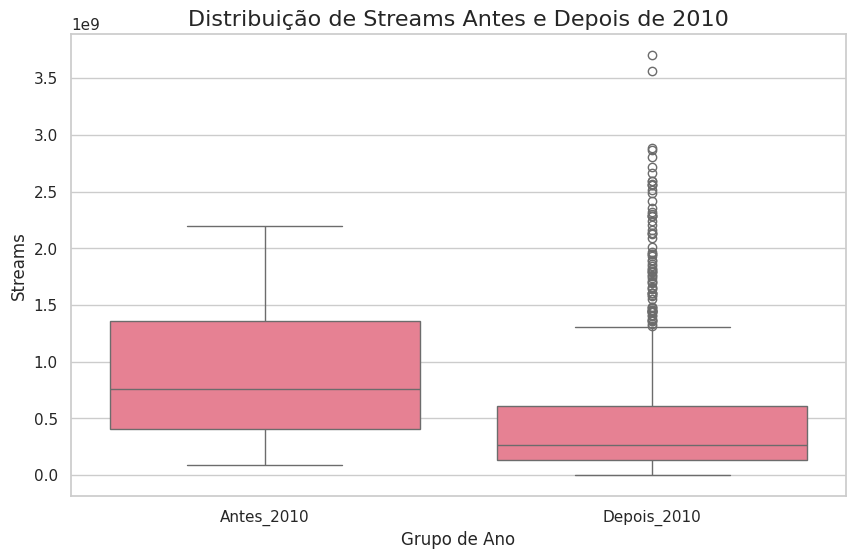

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Tratamento dos dados para a coluna de streams
df['streams'] = df['streams'].astype(str).str.replace(',', '', regex=False).astype(float)
df.dropna(subset=['streams'], inplace=True)
df['streams'] = df['streams'].astype(int)

# Converter a coluna released_year para o tipo numérico
df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce').astype('Int64')

# Remover as linhas com valores ausentes na coluna 'released_year'
df.dropna(subset=['released_year'], inplace=True)

# Criar a coluna de grupo para a comparação
df['grupo_ano'] = np.where(df['released_year'] < 2010, 'Antes_2010', 'Depois_2010')

# Criar o gráfico de box plot para comparar a distribuição de 'streams'
plt.figure(figsize=(10, 6))
sns.boxplot(x='grupo_ano', y='streams', data=df)

# Configurar o título e os rótulos
plt.title('Distribuição de Streams Antes e Depois de 2010', fontsize=16)
plt.xlabel('Grupo de Ano', fontsize=12)
plt.ylabel('Streams', fontsize=12)


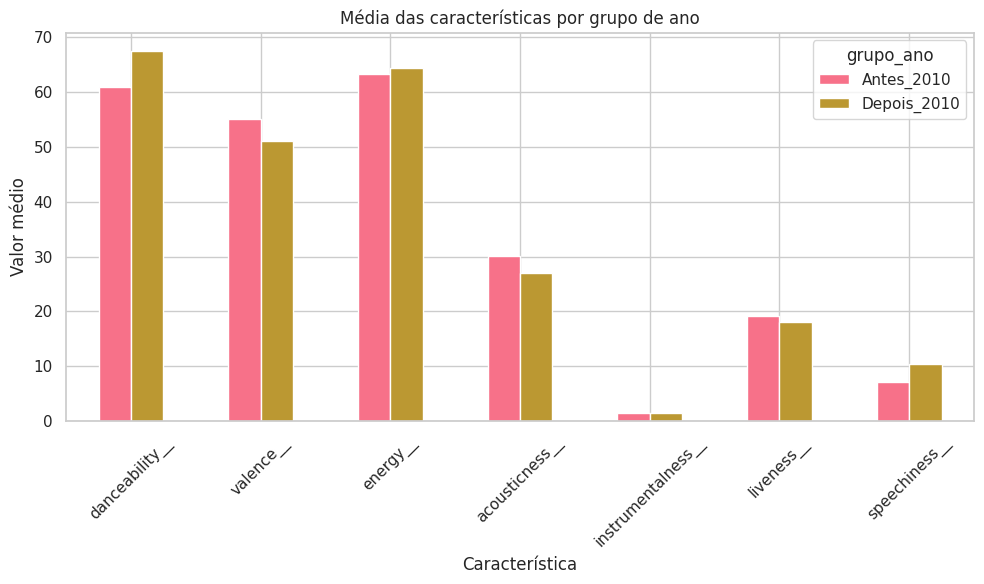

In [48]:
df.groupby('grupo_ano')[caracteristicas].mean().T.plot(kind='bar', figsize=(10,6))
plt.title('Média das características por grupo de ano')
plt.ylabel('Valor médio')
plt.xlabel('Característica')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
!pip install plotly pandas

In [50]:
# Para manipulação de dados
import pandas as pd

# Para visualização (scorecard)
import plotly.graph_objects as go


# Indicadores gerais (exemplos)
total_musicas = df.shape[0]
media_streams = df['streams'].mean()
media_danceability = df['danceability__'].mean()
musicas_antes_2010 = df[df['grupo_ano'] == 'Antes_2010'].shape[0]
musicas_depois_2010 = df[df['grupo_ano'] == 'Depois_2010'].shape[0]

# Scorecard com Plotly
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode="number",
    value=total_musicas,
    title={"text": "Total de Músicas"},
    domain={'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    mode="number",
    value=media_streams,
    number={'prefix': "", "valueformat": ",.0f"},
    title={"text": "Média de Streams"},
    domain={'row': 0, 'column': 1}))

fig.add_trace(go.Indicator(
    mode="number",
    value=media_danceability,
    number={'suffix': "%"},
    title={"text": "Média de Danceability"},
    domain={'row': 0, 'column': 2}))

fig.add_trace(go.Indicator(
    mode="number",
    value=musicas_antes_2010,
    title={"text": "Músicas < 2010"},
    domain={'row': 1, 'column': 0}))

fig.add_trace(go.Indicator(
    mode="number",
    value=musicas_depois_2010,
    title={"text": "Músicas ≥ 2010"},
    domain={'row': 1, 'column': 1}))

fig.update_layout(
    grid={'rows': 2, 'columns': 3, 'pattern': "independent"},
    height=500,
    title="Scorecard da Base de Dados Musical"
)

fig.show()